In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [69]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [98]:
import catboost
from sklearn import preprocessing

In [119]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor

In [122]:
from sklearn.model_selection import KFold

In [140]:
from sklearn.model_selection import train_test_split

In [116]:
import keras

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
data_24h = pd.read_csv('MODIS_C6_Russia_and_Asia_24h.csv')
data_7d = pd.read_csv('MODIS_C6_Russia_and_Asia_7d.csv')
data_virs_24h = pd.read_csv('VNP14IMGTDL_NRT_Russia_and_Asia_24h.csv')

In [7]:
data_7d.shape

(13841, 13)

In [12]:
np.sum(data_24h['confidence'] == 100)

124

In [13]:
data_24h.head(5)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,14.487,120.902,311.6,1.5,1.2,2018-10-19,215,T,40,6.0NRT,295.0,12.2,D
1,36.987,126.694,309.9,1.3,1.1,2018-10-19,210,T,0,6.0NRT,295.2,11.4,D
2,36.985,126.709,310.7,1.3,1.1,2018-10-19,210,T,59,6.0NRT,297.9,13.2,D
3,34.166,135.195,302.4,1.5,1.2,2018-10-19,210,T,0,6.0NRT,289.1,4.3,D
4,32.160,131.411,314.7,1.1,1.0,2018-10-19,210,T,66,6.0NRT,294.7,12.1,D


In [14]:
data_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 13 columns):
latitude      2305 non-null float64
longitude     2305 non-null float64
brightness    2305 non-null float64
scan          2305 non-null float64
track         2305 non-null float64
acq_date      2305 non-null object
acq_time      2305 non-null int64
satellite     2305 non-null object
confidence    2305 non-null int64
version       2305 non-null object
bright_t31    2305 non-null float64
frp           2305 non-null float64
daynight      2305 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 234.2+ KB


In [19]:
data_virs_24h[data_virs_24h['confidence'] == 'high']

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
63,48.50154,133.34692,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,309.9,189.3,D
64,48.49874,133.33919,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,325.1,189.3,D
68,48.50467,133.33440,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,294.4,90.0,D
73,48.50780,133.32185,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,305.6,248.4,D
74,48.49657,133.29073,367.0,0.63,0.72,2018-10-19,230,N,high,1.0NRT,304.4,105.9,D
93,48.51413,133.28525,367.0,0.62,0.72,2018-10-19,230,N,high,1.0NRT,294.6,47.8,D
95,48.21005,132.06018,367.0,0.71,0.75,2018-10-19,230,N,high,1.0NRT,303.3,110.2,D
100,48.20960,132.06175,367.0,0.71,0.75,2018-10-19,230,N,high,1.0NRT,300.0,94.2,D
161,38.13045,117.09946,367.0,0.52,0.67,2018-10-19,406,N,high,1.0NRT,300.4,9.5,D
162,38.13631,117.09673,367.0,0.52,0.67,2018-10-19,406,N,high,1.0NRT,295.5,22.9,D


In [18]:
data_virs_24h.head(5)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,47.63015,34.32149,320.7,0.74,0.76,2018-10-19,112,N,nominal,1.0NRT,281.9,4.1,N
1,47.86716,33.43762,305.7,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,280.4,2.5,N
2,47.87589,33.41182,295.1,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,283.9,1.7,N
3,47.86678,33.43653,301.7,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,280.5,2.9,N
4,47.87288,33.39854,296.7,0.67,0.74,2018-10-19,112,N,nominal,1.0NRT,283.7,1.7,N



FRP изображает встроенную в пиксель излучательную мощность огня в МВт (мегаватт). FRP изображает встроенную в пиксель излучательную мощность огня в МВт (мегаватт). Учитывая уникальное пространственное и спектральное разрешение данных, алгоритм обнаружения пожара VIIRS 375 м был настроен и настроен для оптимизации его отклика на небольшие огни при балансировке появления ложных тревог. Частая насыщенность канала I4 среднего инфракрасного диапазона (3,55-3,93 мкм), обеспечивающая обнаружение активных пожаров, требует дополнительных тестов и процедур, чтобы избежать ошибок классификации пикселей. В результате подпиксельная характеристика пожара (например, излучение радиационной мощности [FRP]) является жизнеспособной только при небольших и / или низкоинтенсивных пожарах. Систематические извлечения FRP основаны на гибридном подходе, объединяющем данные 375 и 750 м. Фактически, начиная с 2015 года, алгоритм включал дополнительные данные VIIRS-канала M13 (3.973-4.128 мкм) 750 м как в агрегированном, так и в неагрегированном формате.

In [20]:
data_forest_kaggle = pd.read_csv('forestfires.csv')

In [47]:
data_forest_kaggle[data_forest_kaggle['area'] != 0]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61
143,jul,sat,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,0.71
144,aug,wed,95.5,99.9,513.3,13.2,23.8,32,5.4,0.0,0.77
145,aug,thu,95.2,131.7,578.8,10.4,27.4,22,4.0,0.0,0.90
146,mar,mon,90.1,39.7,86.6,6.2,13.2,40,5.4,0.0,0.95
147,sep,tue,84.4,73.4,671.9,3.2,24.2,28,3.6,0.0,0.96


In [27]:
data_forest_kaggle.drop(columns=['X', 'Y'], inplace=True)

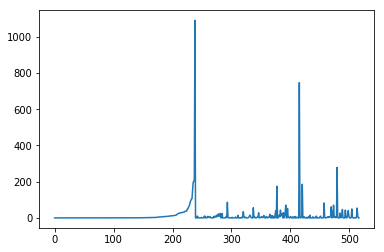

In [36]:
plt.plot(data_forest_kaggle['area'])
plt.show()

In [37]:
data_forest_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.5+ KB


In [40]:
data_dummy = pd.get_dummies(data_forest_kaggle)
target_dummy = data_dummy['area']
data_dummy.drop(columns=['area'], inplace=True)

In [42]:
data_dummy.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
target_dummy.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [50]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(data_dummy, target_dummy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
np.mean(cross_val_score(linear_regressor, data_dummy, target_dummy, scoring='mean_squared_error'))

-4571.92080445913

In [68]:
catboost_regressor = catboost.CatBoostRegressor()
pool_regressor = catboost.Pool(data=data_forest_kaggle.drop(columns=['area']), label=data_forest_kaggle['area'],
                               cat_features=[0, 1])
catboost_regressor.fit(data_dummy, target_dummy)

0:	learn: 64.7982359	total: 4.47ms	remaining: 4.47s
1:	learn: 64.7186147	total: 8.44ms	remaining: 4.21s
2:	learn: 64.1794046	total: 12.4ms	remaining: 4.13s
3:	learn: 63.9300375	total: 16.7ms	remaining: 4.15s
4:	learn: 63.8390584	total: 20.8ms	remaining: 4.13s
5:	learn: 63.7735732	total: 25.5ms	remaining: 4.22s
6:	learn: 63.7182519	total: 29.8ms	remaining: 4.22s
7:	learn: 63.6672950	total: 32ms	remaining: 3.96s
8:	learn: 63.5878710	total: 35.7ms	remaining: 3.93s
9:	learn: 63.5366070	total: 38.5ms	remaining: 3.81s
10:	learn: 63.4374560	total: 42ms	remaining: 3.78s
11:	learn: 62.9989155	total: 46.2ms	remaining: 3.81s
12:	learn: 62.5600630	total: 50.7ms	remaining: 3.85s
13:	learn: 62.5226922	total: 53.6ms	remaining: 3.77s
14:	learn: 62.4830985	total: 57.7ms	remaining: 3.79s
15:	learn: 62.0625719	total: 62.6ms	remaining: 3.85s
16:	learn: 62.0085042	total: 67.6ms	remaining: 3.91s
17:	learn: 61.6774552	total: 72ms	remaining: 3.93s
18:	learn: 61.6454924	total: 76.1ms	remaining: 3.93s
19:	learn

175:	learn: 44.5434703	total: 570ms	remaining: 2.67s
176:	learn: 44.5432019	total: 574ms	remaining: 2.67s
177:	learn: 44.4450900	total: 578ms	remaining: 2.67s
178:	learn: 44.4445036	total: 581ms	remaining: 2.66s
179:	learn: 44.1651020	total: 585ms	remaining: 2.67s
180:	learn: 44.1631764	total: 589ms	remaining: 2.67s
181:	learn: 44.1531500	total: 594ms	remaining: 2.67s
182:	learn: 44.0329747	total: 600ms	remaining: 2.68s
183:	learn: 44.0328238	total: 603ms	remaining: 2.67s
184:	learn: 43.8214721	total: 608ms	remaining: 2.68s
185:	learn: 43.8203426	total: 611ms	remaining: 2.67s
186:	learn: 43.8199077	total: 614ms	remaining: 2.67s
187:	learn: 43.5887455	total: 617ms	remaining: 2.66s
188:	learn: 43.4135557	total: 621ms	remaining: 2.66s
189:	learn: 43.4051131	total: 624ms	remaining: 2.66s
190:	learn: 43.3900792	total: 626ms	remaining: 2.65s
191:	learn: 43.1963852	total: 630ms	remaining: 2.65s
192:	learn: 43.0309719	total: 632ms	remaining: 2.64s
193:	learn: 42.9034257	total: 637ms	remaining:

340:	learn: 30.1188915	total: 1.12s	remaining: 2.17s
341:	learn: 30.0888329	total: 1.13s	remaining: 2.17s
342:	learn: 30.0715981	total: 1.13s	remaining: 2.16s
343:	learn: 30.0380336	total: 1.13s	remaining: 2.16s
344:	learn: 30.0355496	total: 1.13s	remaining: 2.15s
345:	learn: 29.8788265	total: 1.14s	remaining: 2.15s
346:	learn: 29.8446805	total: 1.14s	remaining: 2.15s
347:	learn: 29.8182440	total: 1.15s	remaining: 2.15s
348:	learn: 29.8029235	total: 1.15s	remaining: 2.14s
349:	learn: 29.7152244	total: 1.15s	remaining: 2.14s
350:	learn: 29.5698864	total: 1.16s	remaining: 2.14s
351:	learn: 29.5015738	total: 1.16s	remaining: 2.14s
352:	learn: 29.4407233	total: 1.17s	remaining: 2.14s
353:	learn: 29.4406536	total: 1.17s	remaining: 2.14s
354:	learn: 29.2946792	total: 1.18s	remaining: 2.13s
355:	learn: 29.2055130	total: 1.18s	remaining: 2.13s
356:	learn: 29.2048899	total: 1.18s	remaining: 2.13s
357:	learn: 29.0628762	total: 1.18s	remaining: 2.12s
358:	learn: 28.9296387	total: 1.19s	remaining:

519:	learn: 24.0964249	total: 1.68s	remaining: 1.55s
520:	learn: 24.0128845	total: 1.68s	remaining: 1.54s
521:	learn: 23.9717079	total: 1.68s	remaining: 1.54s
522:	learn: 23.9629113	total: 1.69s	remaining: 1.54s
523:	learn: 23.9625008	total: 1.69s	remaining: 1.53s
524:	learn: 23.9606216	total: 1.69s	remaining: 1.53s
525:	learn: 23.9600477	total: 1.69s	remaining: 1.53s
526:	learn: 23.9583378	total: 1.7s	remaining: 1.52s
527:	learn: 23.9343275	total: 1.7s	remaining: 1.52s
528:	learn: 23.9251989	total: 1.71s	remaining: 1.52s
529:	learn: 23.8858914	total: 1.71s	remaining: 1.52s
530:	learn: 23.8809142	total: 1.72s	remaining: 1.52s
531:	learn: 23.8726624	total: 1.72s	remaining: 1.52s
532:	learn: 23.8549780	total: 1.73s	remaining: 1.51s
533:	learn: 23.8211819	total: 1.73s	remaining: 1.51s
534:	learn: 23.8209624	total: 1.73s	remaining: 1.51s
535:	learn: 23.8125798	total: 1.74s	remaining: 1.5s
536:	learn: 23.8112421	total: 1.74s	remaining: 1.5s
537:	learn: 23.7987997	total: 1.74s	remaining: 1.5

713:	learn: 22.0776126	total: 2.42s	remaining: 968ms
714:	learn: 22.0631909	total: 2.42s	remaining: 965ms
715:	learn: 22.0631216	total: 2.42s	remaining: 961ms
716:	learn: 22.0630128	total: 2.43s	remaining: 958ms
717:	learn: 22.0114030	total: 2.43s	remaining: 954ms
718:	learn: 22.0107866	total: 2.43s	remaining: 951ms
719:	learn: 22.0104327	total: 2.44s	remaining: 948ms
720:	learn: 22.0098164	total: 2.44s	remaining: 945ms
721:	learn: 21.9619846	total: 2.44s	remaining: 942ms
722:	learn: 21.9617774	total: 2.45s	remaining: 939ms
723:	learn: 21.9617118	total: 2.45s	remaining: 936ms
724:	learn: 21.9480925	total: 2.46s	remaining: 933ms
725:	learn: 21.9477672	total: 2.46s	remaining: 930ms
726:	learn: 21.9473610	total: 2.47s	remaining: 926ms
727:	learn: 21.9461728	total: 2.47s	remaining: 923ms
728:	learn: 21.9460391	total: 2.47s	remaining: 919ms
729:	learn: 21.9321173	total: 2.48s	remaining: 916ms
730:	learn: 21.9292050	total: 2.48s	remaining: 912ms
731:	learn: 21.9291278	total: 2.48s	remaining:

885:	learn: 20.6803145	total: 2.96s	remaining: 380ms
886:	learn: 20.6767471	total: 2.96s	remaining: 377ms
887:	learn: 20.6669131	total: 2.96s	remaining: 373ms
888:	learn: 20.6631883	total: 2.96s	remaining: 370ms
889:	learn: 20.6622943	total: 2.97s	remaining: 367ms
890:	learn: 20.6457883	total: 2.97s	remaining: 364ms
891:	learn: 20.6457051	total: 2.98s	remaining: 360ms
892:	learn: 20.6414293	total: 2.98s	remaining: 357ms
893:	learn: 20.6408227	total: 2.98s	remaining: 354ms
894:	learn: 20.5978479	total: 2.99s	remaining: 350ms
895:	learn: 20.5977016	total: 2.99s	remaining: 347ms
896:	learn: 20.5976652	total: 2.99s	remaining: 344ms
897:	learn: 20.5554673	total: 3s	remaining: 340ms
898:	learn: 20.5074939	total: 3s	remaining: 337ms
899:	learn: 20.4983128	total: 3s	remaining: 334ms
900:	learn: 20.4980883	total: 3.01s	remaining: 330ms
901:	learn: 20.4945346	total: 3.01s	remaining: 327ms
902:	learn: 20.4941568	total: 3.01s	remaining: 324ms
903:	learn: 20.4875423	total: 3.02s	remaining: 321ms
90

In [74]:
np.mean(cross_val_score(catboost_regressor, data_dummy, target_dummy, scoring='mean_squared_error', cv=3))

0:	learn: 79.2840345	total: 5.24ms	remaining: 5.23s
1:	learn: 79.1377882	total: 10.1ms	remaining: 5.02s
2:	learn: 78.9751891	total: 14.7ms	remaining: 4.89s
3:	learn: 78.8450706	total: 19.6ms	remaining: 4.89s
4:	learn: 78.6156679	total: 24.4ms	remaining: 4.86s
5:	learn: 78.4871101	total: 29.4ms	remaining: 4.87s
6:	learn: 77.7145477	total: 33.8ms	remaining: 4.8s
7:	learn: 77.5665998	total: 38.5ms	remaining: 4.77s
8:	learn: 77.4578383	total: 43.2ms	remaining: 4.75s
9:	learn: 77.2144769	total: 48.6ms	remaining: 4.81s
10:	learn: 77.0947728	total: 53.4ms	remaining: 4.8s
11:	learn: 77.0107003	total: 57.4ms	remaining: 4.73s
12:	learn: 76.8993657	total: 64.4ms	remaining: 4.89s
13:	learn: 76.8167898	total: 69.7ms	remaining: 4.91s
14:	learn: 76.7521247	total: 74ms	remaining: 4.86s
15:	learn: 76.6537032	total: 78.7ms	remaining: 4.84s
16:	learn: 76.5910933	total: 82.8ms	remaining: 4.79s
17:	learn: 76.3879942	total: 87ms	remaining: 4.74s
18:	learn: 76.1960389	total: 92.1ms	remaining: 4.75s
19:	learn

161:	learn: 49.4953938	total: 579ms	remaining: 2.99s
162:	learn: 49.1793163	total: 583ms	remaining: 2.99s
163:	learn: 48.9332663	total: 588ms	remaining: 3s
164:	learn: 48.8923814	total: 593ms	remaining: 3s
165:	learn: 48.8813472	total: 598ms	remaining: 3s
166:	learn: 48.8501191	total: 603ms	remaining: 3s
167:	learn: 48.8412076	total: 607ms	remaining: 3.01s
168:	learn: 48.8336355	total: 612ms	remaining: 3.01s
169:	learn: 48.6318671	total: 619ms	remaining: 3.02s
170:	learn: 48.4420161	total: 624ms	remaining: 3.03s
171:	learn: 48.2365144	total: 629ms	remaining: 3.03s
172:	learn: 48.1965026	total: 634ms	remaining: 3.03s
173:	learn: 48.1921400	total: 637ms	remaining: 3.02s
174:	learn: 48.1665422	total: 642ms	remaining: 3.02s
175:	learn: 48.0064439	total: 647ms	remaining: 3.03s
176:	learn: 47.9923980	total: 654ms	remaining: 3.04s
177:	learn: 47.9650422	total: 659ms	remaining: 3.04s
178:	learn: 47.9456931	total: 665ms	remaining: 3.05s
179:	learn: 47.7707479	total: 668ms	remaining: 3.04s
180:	

366:	learn: 30.1669607	total: 1.33s	remaining: 2.3s
367:	learn: 30.1098771	total: 1.34s	remaining: 2.3s
368:	learn: 30.0888447	total: 1.34s	remaining: 2.3s
369:	learn: 29.9891213	total: 1.35s	remaining: 2.3s
370:	learn: 29.9570856	total: 1.35s	remaining: 2.29s
371:	learn: 29.9389076	total: 1.36s	remaining: 2.29s
372:	learn: 29.8960946	total: 1.36s	remaining: 2.29s
373:	learn: 29.8892232	total: 1.37s	remaining: 2.29s
374:	learn: 29.8855906	total: 1.37s	remaining: 2.29s
375:	learn: 29.7862115	total: 1.38s	remaining: 2.28s
376:	learn: 29.6884893	total: 1.38s	remaining: 2.28s
377:	learn: 29.6041379	total: 1.38s	remaining: 2.27s
378:	learn: 29.5934059	total: 1.39s	remaining: 2.27s
379:	learn: 29.5834641	total: 1.39s	remaining: 2.27s
380:	learn: 29.5441715	total: 1.39s	remaining: 2.26s
381:	learn: 29.5396248	total: 1.4s	remaining: 2.26s
382:	learn: 29.4454252	total: 1.4s	remaining: 2.25s
383:	learn: 29.4425645	total: 1.4s	remaining: 2.25s
384:	learn: 29.3543288	total: 1.41s	remaining: 2.24s


535:	learn: 24.7693811	total: 1.89s	remaining: 1.64s
536:	learn: 24.7476792	total: 1.89s	remaining: 1.63s
537:	learn: 24.7443877	total: 1.9s	remaining: 1.63s
538:	learn: 24.7290351	total: 1.9s	remaining: 1.63s
539:	learn: 24.7070337	total: 1.91s	remaining: 1.62s
540:	learn: 24.6865882	total: 1.91s	remaining: 1.62s
541:	learn: 24.6565035	total: 1.92s	remaining: 1.62s
542:	learn: 24.6533864	total: 1.92s	remaining: 1.62s
543:	learn: 24.6468927	total: 1.93s	remaining: 1.61s
544:	learn: 24.6176100	total: 1.93s	remaining: 1.61s
545:	learn: 24.5897807	total: 1.93s	remaining: 1.61s
546:	learn: 24.5620286	total: 1.94s	remaining: 1.6s
547:	learn: 24.5590686	total: 1.94s	remaining: 1.6s
548:	learn: 24.5398594	total: 1.94s	remaining: 1.59s
549:	learn: 24.5069237	total: 1.95s	remaining: 1.59s
550:	learn: 24.4790616	total: 1.95s	remaining: 1.59s
551:	learn: 24.4759407	total: 1.95s	remaining: 1.58s
552:	learn: 24.4623788	total: 1.95s	remaining: 1.58s
553:	learn: 24.4361825	total: 1.96s	remaining: 1.5

701:	learn: 22.4605753	total: 2.44s	remaining: 1.03s
702:	learn: 22.4528332	total: 2.44s	remaining: 1.03s
703:	learn: 22.4502236	total: 2.44s	remaining: 1.03s
704:	learn: 22.4471691	total: 2.45s	remaining: 1.02s
705:	learn: 22.4377851	total: 2.45s	remaining: 1.02s
706:	learn: 22.3650287	total: 2.46s	remaining: 1.02s
707:	learn: 22.3634273	total: 2.46s	remaining: 1.02s
708:	learn: 22.3619290	total: 2.47s	remaining: 1.01s
709:	learn: 22.3613392	total: 2.47s	remaining: 1.01s
710:	learn: 22.3449339	total: 2.48s	remaining: 1.01s
711:	learn: 22.3395651	total: 2.48s	remaining: 1s
712:	learn: 22.3308491	total: 2.48s	remaining: 999ms
713:	learn: 22.3257779	total: 2.48s	remaining: 995ms
714:	learn: 22.3232780	total: 2.49s	remaining: 992ms
715:	learn: 22.2779713	total: 2.49s	remaining: 988ms
716:	learn: 22.2750483	total: 2.49s	remaining: 984ms
717:	learn: 22.2696694	total: 2.5s	remaining: 981ms
718:	learn: 22.2197232	total: 2.5s	remaining: 977ms
719:	learn: 22.2145853	total: 2.5s	remaining: 973ms

868:	learn: 20.8678883	total: 2.98s	remaining: 450ms
869:	learn: 20.8669775	total: 2.99s	remaining: 446ms
870:	learn: 20.8667570	total: 2.99s	remaining: 443ms
871:	learn: 20.8640186	total: 3s	remaining: 440ms
872:	learn: 20.8603682	total: 3s	remaining: 437ms
873:	learn: 20.8588870	total: 3.01s	remaining: 433ms
874:	learn: 20.8562408	total: 3.01s	remaining: 430ms
875:	learn: 20.8516924	total: 3.01s	remaining: 427ms
876:	learn: 20.8484189	total: 3.02s	remaining: 423ms
877:	learn: 20.8441722	total: 3.02s	remaining: 420ms
878:	learn: 20.8229243	total: 3.02s	remaining: 416ms
879:	learn: 20.8199855	total: 3.03s	remaining: 413ms
880:	learn: 20.8161659	total: 3.03s	remaining: 409ms
881:	learn: 20.8132755	total: 3.03s	remaining: 406ms
882:	learn: 20.8110889	total: 3.04s	remaining: 403ms
883:	learn: 20.8097745	total: 3.04s	remaining: 399ms
884:	learn: 20.8085446	total: 3.04s	remaining: 396ms
885:	learn: 20.8008899	total: 3.05s	remaining: 392ms
886:	learn: 20.7991017	total: 3.05s	remaining: 389ms

27:	learn: 44.7456309	total: 74.1ms	remaining: 2.57s
28:	learn: 44.7110956	total: 79ms	remaining: 2.64s
29:	learn: 44.6391128	total: 83.2ms	remaining: 2.69s
30:	learn: 44.6249020	total: 87.3ms	remaining: 2.73s
31:	learn: 44.6162289	total: 91.7ms	remaining: 2.77s
32:	learn: 44.5451750	total: 95.8ms	remaining: 2.81s
33:	learn: 44.5221402	total: 101ms	remaining: 2.87s
34:	learn: 44.4941472	total: 104ms	remaining: 2.87s
35:	learn: 44.4662820	total: 107ms	remaining: 2.87s
36:	learn: 44.4407609	total: 112ms	remaining: 2.91s
37:	learn: 44.4251662	total: 115ms	remaining: 2.92s
38:	learn: 44.3960417	total: 118ms	remaining: 2.91s
39:	learn: 44.3769085	total: 121ms	remaining: 2.91s
40:	learn: 44.2878015	total: 125ms	remaining: 2.92s
41:	learn: 44.2576667	total: 128ms	remaining: 2.92s
42:	learn: 44.2111177	total: 131ms	remaining: 2.92s
43:	learn: 44.1531435	total: 134ms	remaining: 2.91s
44:	learn: 44.1331654	total: 137ms	remaining: 2.91s
45:	learn: 44.1240982	total: 139ms	remaining: 2.88s
46:	lear

217:	learn: 36.6776027	total: 645ms	remaining: 2.31s
218:	learn: 36.6662932	total: 650ms	remaining: 2.32s
219:	learn: 36.6659120	total: 655ms	remaining: 2.32s
220:	learn: 36.6426745	total: 659ms	remaining: 2.32s
221:	learn: 36.6421454	total: 662ms	remaining: 2.32s
222:	learn: 36.5912529	total: 667ms	remaining: 2.32s
223:	learn: 36.4836212	total: 671ms	remaining: 2.32s
224:	learn: 36.2938245	total: 676ms	remaining: 2.33s
225:	learn: 36.2793451	total: 679ms	remaining: 2.33s
226:	learn: 36.0357401	total: 684ms	remaining: 2.33s
227:	learn: 36.0356009	total: 686ms	remaining: 2.32s
228:	learn: 35.9101928	total: 688ms	remaining: 2.32s
229:	learn: 35.9096091	total: 690ms	remaining: 2.31s
230:	learn: 35.8635082	total: 694ms	remaining: 2.31s
231:	learn: 35.6284205	total: 697ms	remaining: 2.31s
232:	learn: 35.5698080	total: 700ms	remaining: 2.3s
233:	learn: 35.5695896	total: 701ms	remaining: 2.3s
234:	learn: 35.4078649	total: 704ms	remaining: 2.29s
235:	learn: 35.3947504	total: 707ms	remaining: 2

391:	learn: 27.5396265	total: 1.2s	remaining: 1.87s
392:	learn: 27.3835524	total: 1.21s	remaining: 1.87s
393:	learn: 27.2882440	total: 1.21s	remaining: 1.87s
394:	learn: 27.2828679	total: 1.22s	remaining: 1.86s
395:	learn: 27.1844034	total: 1.22s	remaining: 1.86s
396:	learn: 27.1745983	total: 1.23s	remaining: 1.86s
397:	learn: 27.1706458	total: 1.23s	remaining: 1.86s
398:	learn: 27.0744372	total: 1.24s	remaining: 1.86s
399:	learn: 26.9807518	total: 1.24s	remaining: 1.86s
400:	learn: 26.9751092	total: 1.24s	remaining: 1.86s
401:	learn: 26.9687112	total: 1.25s	remaining: 1.86s
402:	learn: 26.9593715	total: 1.25s	remaining: 1.86s
403:	learn: 26.7708253	total: 1.26s	remaining: 1.86s
404:	learn: 26.7668933	total: 1.26s	remaining: 1.85s
405:	learn: 26.7556609	total: 1.26s	remaining: 1.85s
406:	learn: 26.7549033	total: 1.27s	remaining: 1.85s
407:	learn: 26.6639228	total: 1.27s	remaining: 1.84s
408:	learn: 26.6269335	total: 1.27s	remaining: 1.84s
409:	learn: 26.4808350	total: 1.28s	remaining: 

562:	learn: 22.9446788	total: 1.76s	remaining: 1.36s
563:	learn: 22.9419603	total: 1.76s	remaining: 1.36s
564:	learn: 22.9411779	total: 1.77s	remaining: 1.36s
565:	learn: 22.9327116	total: 1.77s	remaining: 1.36s
566:	learn: 22.9316090	total: 1.78s	remaining: 1.36s
567:	learn: 22.9315154	total: 1.78s	remaining: 1.35s
568:	learn: 22.9272540	total: 1.78s	remaining: 1.35s
569:	learn: 22.9226083	total: 1.79s	remaining: 1.35s
570:	learn: 22.9221009	total: 1.79s	remaining: 1.35s
571:	learn: 22.8823525	total: 1.8s	remaining: 1.34s
572:	learn: 22.8801032	total: 1.8s	remaining: 1.34s
573:	learn: 22.8775508	total: 1.8s	remaining: 1.34s
574:	learn: 22.7941901	total: 1.81s	remaining: 1.34s
575:	learn: 22.7938245	total: 1.81s	remaining: 1.33s
576:	learn: 22.7932496	total: 1.82s	remaining: 1.33s
577:	learn: 22.7881476	total: 1.82s	remaining: 1.33s
578:	learn: 22.7846734	total: 1.82s	remaining: 1.32s
579:	learn: 22.7836053	total: 1.83s	remaining: 1.32s
580:	learn: 22.7830278	total: 1.83s	remaining: 1.

729:	learn: 20.1433208	total: 2.3s	remaining: 852ms
730:	learn: 20.0779481	total: 2.31s	remaining: 850ms
731:	learn: 20.0775860	total: 2.31s	remaining: 847ms
732:	learn: 20.0735854	total: 2.32s	remaining: 844ms
733:	learn: 20.0707889	total: 2.32s	remaining: 842ms
734:	learn: 20.0686835	total: 2.33s	remaining: 839ms
735:	learn: 20.0223986	total: 2.33s	remaining: 836ms
736:	learn: 19.9554653	total: 2.33s	remaining: 833ms
737:	learn: 19.9545845	total: 2.34s	remaining: 830ms
738:	learn: 19.9207701	total: 2.34s	remaining: 827ms
739:	learn: 19.9108468	total: 2.35s	remaining: 824ms
740:	learn: 19.9088753	total: 2.35s	remaining: 821ms
741:	learn: 19.9031666	total: 2.35s	remaining: 818ms
742:	learn: 19.9025770	total: 2.35s	remaining: 815ms
743:	learn: 19.9025066	total: 2.36s	remaining: 812ms
744:	learn: 19.8970817	total: 2.36s	remaining: 808ms
745:	learn: 19.8946936	total: 2.36s	remaining: 805ms
746:	learn: 19.8946273	total: 2.37s	remaining: 802ms
747:	learn: 19.8931043	total: 2.37s	remaining: 

896:	learn: 18.3974477	total: 2.84s	remaining: 326ms
897:	learn: 18.3958943	total: 2.85s	remaining: 323ms
898:	learn: 18.3778804	total: 2.85s	remaining: 320ms
899:	learn: 18.3542983	total: 2.85s	remaining: 317ms
900:	learn: 18.3457967	total: 2.86s	remaining: 314ms
901:	learn: 18.3336047	total: 2.86s	remaining: 311ms
902:	learn: 18.3334643	total: 2.87s	remaining: 309ms
903:	learn: 18.3055454	total: 2.88s	remaining: 306ms
904:	learn: 18.2972742	total: 2.89s	remaining: 303ms
905:	learn: 18.2971578	total: 2.9s	remaining: 301ms
906:	learn: 18.2939144	total: 2.9s	remaining: 298ms
907:	learn: 18.2924500	total: 2.91s	remaining: 295ms
908:	learn: 18.2922802	total: 2.91s	remaining: 292ms
909:	learn: 18.2877486	total: 2.92s	remaining: 289ms
910:	learn: 18.2674339	total: 2.93s	remaining: 286ms
911:	learn: 18.2202788	total: 2.93s	remaining: 283ms
912:	learn: 18.1686836	total: 2.94s	remaining: 280ms
913:	learn: 18.1595030	total: 2.94s	remaining: 277ms
914:	learn: 18.1559961	total: 2.94s	remaining: 2

113:	learn: 55.4774158	total: 324ms	remaining: 2.52s
114:	learn: 55.4759311	total: 326ms	remaining: 2.51s
115:	learn: 55.2785275	total: 329ms	remaining: 2.51s
116:	learn: 55.2552419	total: 334ms	remaining: 2.52s
117:	learn: 55.0179619	total: 338ms	remaining: 2.53s
118:	learn: 54.9390808	total: 343ms	remaining: 2.54s
119:	learn: 54.9046674	total: 350ms	remaining: 2.56s
120:	learn: 54.8894384	total: 354ms	remaining: 2.57s
121:	learn: 54.8608272	total: 359ms	remaining: 2.58s
122:	learn: 54.8595319	total: 364ms	remaining: 2.6s
123:	learn: 54.8560917	total: 368ms	remaining: 2.6s
124:	learn: 54.8109106	total: 372ms	remaining: 2.6s
125:	learn: 54.7955450	total: 375ms	remaining: 2.6s
126:	learn: 54.5578118	total: 379ms	remaining: 2.61s
127:	learn: 54.5538993	total: 382ms	remaining: 2.6s
128:	learn: 54.5245309	total: 388ms	remaining: 2.62s
129:	learn: 54.5241817	total: 390ms	remaining: 2.61s
130:	learn: 54.4971470	total: 394ms	remaining: 2.61s
131:	learn: 54.4822895	total: 397ms	remaining: 2.61

282:	learn: 43.6525128	total: 892ms	remaining: 2.26s
283:	learn: 43.4598112	total: 897ms	remaining: 2.26s
284:	learn: 43.4567299	total: 901ms	remaining: 2.26s
285:	learn: 43.2764689	total: 906ms	remaining: 2.26s
286:	learn: 43.2762118	total: 910ms	remaining: 2.26s
287:	learn: 43.0734480	total: 916ms	remaining: 2.27s
288:	learn: 42.8966836	total: 922ms	remaining: 2.27s
289:	learn: 42.8791455	total: 926ms	remaining: 2.27s
290:	learn: 42.5999079	total: 930ms	remaining: 2.27s
291:	learn: 42.4157853	total: 934ms	remaining: 2.26s
292:	learn: 42.2440943	total: 938ms	remaining: 2.26s
293:	learn: 42.2430782	total: 942ms	remaining: 2.26s
294:	learn: 42.2411232	total: 946ms	remaining: 2.26s
295:	learn: 42.0639568	total: 950ms	remaining: 2.26s
296:	learn: 42.0369473	total: 953ms	remaining: 2.25s
297:	learn: 41.8602179	total: 956ms	remaining: 2.25s
298:	learn: 41.8573999	total: 960ms	remaining: 2.25s
299:	learn: 41.6880252	total: 964ms	remaining: 2.25s
300:	learn: 41.6862444	total: 967ms	remaining:

474:	learn: 31.5069264	total: 1.64s	remaining: 1.81s
475:	learn: 31.4700659	total: 1.64s	remaining: 1.81s
476:	learn: 31.3648218	total: 1.65s	remaining: 1.8s
477:	learn: 31.3617585	total: 1.65s	remaining: 1.8s
478:	learn: 31.3384177	total: 1.65s	remaining: 1.8s
479:	learn: 31.3113701	total: 1.66s	remaining: 1.8s
480:	learn: 31.3099581	total: 1.66s	remaining: 1.79s
481:	learn: 31.2741759	total: 1.67s	remaining: 1.79s
482:	learn: 31.2698376	total: 1.67s	remaining: 1.79s
483:	learn: 31.2360211	total: 1.68s	remaining: 1.79s
484:	learn: 31.2356981	total: 1.68s	remaining: 1.79s
485:	learn: 31.2347007	total: 1.69s	remaining: 1.78s
486:	learn: 31.2105585	total: 1.69s	remaining: 1.78s
487:	learn: 31.2036525	total: 1.7s	remaining: 1.78s
488:	learn: 31.2011210	total: 1.7s	remaining: 1.77s
489:	learn: 31.1907362	total: 1.7s	remaining: 1.77s
490:	learn: 31.1852517	total: 1.71s	remaining: 1.77s
491:	learn: 31.1807797	total: 1.71s	remaining: 1.77s
492:	learn: 31.0809614	total: 1.71s	remaining: 1.76s


631:	learn: 28.1667306	total: 2.2s	remaining: 1.28s
632:	learn: 28.1575410	total: 2.2s	remaining: 1.28s
633:	learn: 28.1573304	total: 2.21s	remaining: 1.27s
634:	learn: 28.1471823	total: 2.21s	remaining: 1.27s
635:	learn: 28.1466727	total: 2.22s	remaining: 1.27s
636:	learn: 28.1376712	total: 2.23s	remaining: 1.27s
637:	learn: 28.1324005	total: 2.23s	remaining: 1.27s
638:	learn: 28.0692779	total: 2.24s	remaining: 1.26s
639:	learn: 28.0580974	total: 2.25s	remaining: 1.26s
640:	learn: 27.9968133	total: 2.25s	remaining: 1.26s
641:	learn: 27.9779854	total: 2.26s	remaining: 1.26s
642:	learn: 27.9772738	total: 2.26s	remaining: 1.26s
643:	learn: 27.9417854	total: 2.27s	remaining: 1.25s
644:	learn: 27.9292483	total: 2.27s	remaining: 1.25s
645:	learn: 27.9287783	total: 2.28s	remaining: 1.25s
646:	learn: 27.9208131	total: 2.28s	remaining: 1.25s
647:	learn: 27.9203250	total: 2.29s	remaining: 1.24s
648:	learn: 27.9125663	total: 2.29s	remaining: 1.24s
649:	learn: 27.8536458	total: 2.3s	remaining: 1.

817:	learn: 25.8127925	total: 2.93s	remaining: 652ms
818:	learn: 25.8113939	total: 2.94s	remaining: 649ms
819:	learn: 25.8098084	total: 2.94s	remaining: 645ms
820:	learn: 25.8086220	total: 2.94s	remaining: 642ms
821:	learn: 25.8067738	total: 2.95s	remaining: 639ms
822:	learn: 25.8066427	total: 2.95s	remaining: 635ms
823:	learn: 25.8053238	total: 2.96s	remaining: 632ms
824:	learn: 25.7733925	total: 2.97s	remaining: 629ms
825:	learn: 25.7704211	total: 2.97s	remaining: 626ms
826:	learn: 25.7701552	total: 2.98s	remaining: 623ms
827:	learn: 25.7700456	total: 2.98s	remaining: 619ms
828:	learn: 25.7696922	total: 2.98s	remaining: 616ms
829:	learn: 25.7693542	total: 2.99s	remaining: 613ms
830:	learn: 25.7656008	total: 3s	remaining: 610ms
831:	learn: 25.7642488	total: 3s	remaining: 606ms
832:	learn: 25.7626215	total: 3.01s	remaining: 603ms
833:	learn: 25.7562759	total: 3.01s	remaining: 600ms
834:	learn: 25.7561866	total: 3.02s	remaining: 596ms
835:	learn: 25.7521521	total: 3.02s	remaining: 593ms

995:	learn: 24.3346313	total: 3.67s	remaining: 14.8ms
996:	learn: 24.3345827	total: 3.68s	remaining: 11.1ms
997:	learn: 24.3339553	total: 3.68s	remaining: 7.38ms
998:	learn: 24.3336224	total: 3.69s	remaining: 3.69ms
999:	learn: 24.3332992	total: 3.69s	remaining: 0us


-6066.879354146936

In [79]:
data_forest_kaggle['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [80]:
data_forest_kaggle.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data_forest_kaggle.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), (1, 2, 3, 4, 5, 6, 7), 
                           inplace=True)

In [82]:
data_forest_kaggle.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


[]

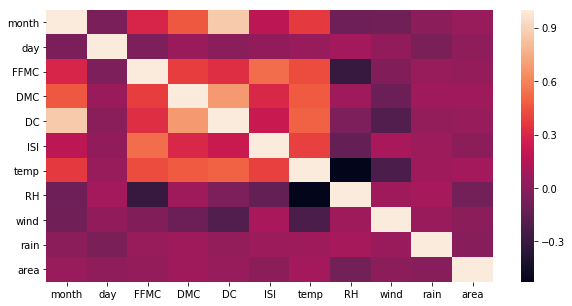

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(data_forest_kaggle.corr())
plt.plot()

In [88]:
data_forest_kaggle.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.086368,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.013438,-0.048340,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [90]:
data_forest_kaggle.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [95]:
data = data_forest_kaggle.copy()
data.drop(columns=['area'], inplace=True)
target = data_forest_kaggle['area']

In [94]:
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [105]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(data, target)

cross_val_score(linear_regressor, data, target, scoring='mean_absolute_error')

array([-18.75135196, -24.19807621, -24.92981143])

In [106]:
scalar = preprocessing.StandardScaler()
data_scaler = scalar.fit_transform(data)

linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(data_scaler, target)

cross_val_score(linear_regressor, data_scaler, target, scoring='mean_squared_error')

array([ -435.38620423, -8098.43214264, -4163.22940513])

In [102]:
data_scaler

array([[-1.96844301,  0.35772091, -0.80595947, ...,  0.41172435,
         1.49861442, -0.07326831],
       [ 1.1101202 , -1.09090867, -0.00810203, ..., -0.69245628,
        -1.74175564, -0.07326831],
       [ 1.1101202 ,  0.84059743, -0.00810203, ..., -0.69245628,
        -1.51828184, -0.07326831],
       ...,
       [ 0.23053071,  1.32347396, -1.64008316, ...,  1.57724834,
         1.49861442, -0.07326831],
       [ 0.23053071,  0.84059743,  0.68095666, ..., -0.14036597,
        -0.00983371, -0.07326831],
       [ 1.54991494, -1.09090867, -2.02087875, ..., -0.81514302,
         0.26950853, -0.07326831]])

In [154]:
data_forest_kaggle = pd.read_csv('forestfires.csv')


In [155]:
data_forest_kaggle.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data_forest_kaggle.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'), (1, 2, 3, 4, 5, 6, 7), 
                           inplace=True)

In [156]:
data_forest_kaggle.head(5)
data_forest_kaggle.drop(columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI'], inplace=True)

In [165]:
data_forest_kaggle.head(5)

,month,day,temp,RH,wind,rain,area
0,3,5,8.2,51,6.7,0.0,0.0
1,10,2,18.0,33,0.9,0.0,0.0
2,10,6,14.6,33,1.3,0.0,0.0
3,3,5,8.3,97,4.0,0.2,0.0
4,3,7,11.4,99,1.8,0.0,0.0


In [168]:
data_forest_kaggle[data_forest_kaggle['area'] > 0]

,month,day,temp,RH,wind,rain,area
138,7,2,18.0,42,2.7,0.0,0.36
139,9,2,21.7,38,2.2,0.0,0.43
140,9,1,21.9,39,1.8,0.0,0.47
141,8,3,23.3,31,4.5,0.0,0.55
142,8,5,21.2,51,8.9,0.0,0.61
143,7,6,16.6,53,5.4,0.0,0.71
144,8,3,23.8,32,5.4,0.0,0.77
145,8,4,27.4,22,4.0,0.0,0.90
146,3,1,13.2,40,5.4,0.0,0.95
147,9,2,24.2,28,3.6,0.0,0.96


In [157]:
dataset = data_forest_kaggle.values


X = dataset[:,0:6]
Y = dataset[:,6]

In [158]:
Y = np.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [159]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=6, kernel_initializer='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(5, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)
estimator.fit(X, Y)

kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.00 (0.01) MSE


In [160]:
X_train, X_test, y_trian, y_test = train_test_split(X, Y, test_size=0.2)

In [161]:
estimator.fit(X_train, y_trian)

In [162]:
mean_squared_error(y_test, estimator.predict(X_test))

0.00034780558739277783

In [184]:
data_pred = pd.read_csv('predict.csv', delimiter=';')

In [185]:
data_pred

,month,day,temp,RH,wind,rain
0,7,1,22.6,57,4.90,0
1,8,2,32.3,58,4.10,0
2,3,3,32.3,59,4.11,0
3,8,2,22.1,60,4.12,0
4,8,2,22.1,61,4.13,0
5,4,2,33.2,62,4.14,0
6,2,2,32.3,63,4.15,0
7,8,2,32.3,64,4.16,0


In [186]:
estimator.predict(data_pred)

array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [187]:
estimator_catboost = catboost.CatBoostRegressor()
estimator_catboost.fit(data_forest_kaggle.drop(columns=['area']), data_forest_kaggle['area'])

estimator_catboost.predict(data_pred)

0:	learn: 64.7498248	total: 6.7ms	remaining: 6.7s
1:	learn: 64.6683959	total: 11.1ms	remaining: 5.53s
2:	learn: 64.5813073	total: 15.6ms	remaining: 5.2s
3:	learn: 64.5076026	total: 19.6ms	remaining: 4.89s
4:	learn: 64.4375286	total: 23.9ms	remaining: 4.76s
5:	learn: 64.3659901	total: 27.7ms	remaining: 4.59s
6:	learn: 64.3022006	total: 31.6ms	remaining: 4.48s
7:	learn: 64.2458112	total: 34.7ms	remaining: 4.3s
8:	learn: 64.1944183	total: 39.3ms	remaining: 4.33s
9:	learn: 64.1176688	total: 43ms	remaining: 4.26s
10:	learn: 63.6720547	total: 46.9ms	remaining: 4.22s
11:	learn: 63.6121074	total: 50.7ms	remaining: 4.17s
12:	learn: 63.5507890	total: 55.4ms	remaining: 4.21s
13:	learn: 63.3809561	total: 59.2ms	remaining: 4.17s
14:	learn: 63.3345930	total: 63.6ms	remaining: 4.18s
15:	learn: 63.2888320	total: 66.7ms	remaining: 4.1s
16:	learn: 63.1676199	total: 70.6ms	remaining: 4.08s
17:	learn: 63.1306461	total: 74.6ms	remaining: 4.07s
18:	learn: 63.0917044	total: 78.7ms	remaining: 4.06s
19:	learn:

158:	learn: 53.9529523	total: 581ms	remaining: 3.07s
159:	learn: 53.9477797	total: 585ms	remaining: 3.07s
160:	learn: 53.4653845	total: 588ms	remaining: 3.07s
161:	learn: 53.4273521	total: 592ms	remaining: 3.06s
162:	learn: 53.4210764	total: 595ms	remaining: 3.06s
163:	learn: 53.4168029	total: 599ms	remaining: 3.05s
164:	learn: 53.3551791	total: 603ms	remaining: 3.05s
165:	learn: 53.3226045	total: 607ms	remaining: 3.05s
166:	learn: 53.3186273	total: 610ms	remaining: 3.04s
167:	learn: 53.0676320	total: 614ms	remaining: 3.04s
168:	learn: 53.0346604	total: 617ms	remaining: 3.04s
169:	learn: 52.5657660	total: 621ms	remaining: 3.03s
170:	learn: 52.5641107	total: 625ms	remaining: 3.03s
171:	learn: 52.5620417	total: 629ms	remaining: 3.03s
172:	learn: 52.5600721	total: 631ms	remaining: 3.02s
173:	learn: 52.5566980	total: 636ms	remaining: 3.02s
174:	learn: 52.5553570	total: 640ms	remaining: 3.02s
175:	learn: 52.5205844	total: 644ms	remaining: 3.02s
176:	learn: 52.5203897	total: 648ms	remaining:

337:	learn: 42.2656401	total: 1.34s	remaining: 2.63s
338:	learn: 42.2655220	total: 1.35s	remaining: 2.63s
339:	learn: 42.2625945	total: 1.35s	remaining: 2.62s
340:	learn: 42.2398478	total: 1.36s	remaining: 2.62s
341:	learn: 42.2398289	total: 1.36s	remaining: 2.61s
342:	learn: 42.0721088	total: 1.36s	remaining: 2.61s
343:	learn: 42.0577690	total: 1.36s	remaining: 2.6s
344:	learn: 42.0567115	total: 1.37s	remaining: 2.6s
345:	learn: 42.0346670	total: 1.37s	remaining: 2.6s
346:	learn: 41.7381737	total: 1.38s	remaining: 2.59s
347:	learn: 41.7373101	total: 1.38s	remaining: 2.59s
348:	learn: 41.7358350	total: 1.38s	remaining: 2.58s
349:	learn: 41.7346960	total: 1.39s	remaining: 2.58s
350:	learn: 41.7273821	total: 1.39s	remaining: 2.57s
351:	learn: 41.7083754	total: 1.4s	remaining: 2.57s
352:	learn: 41.6688829	total: 1.4s	remaining: 2.56s
353:	learn: 41.6644508	total: 1.4s	remaining: 2.56s
354:	learn: 41.6638995	total: 1.4s	remaining: 2.55s
355:	learn: 41.6636048	total: 1.41s	remaining: 2.55s


502:	learn: 37.2541839	total: 1.91s	remaining: 1.89s
503:	learn: 37.2463063	total: 1.91s	remaining: 1.88s
504:	learn: 37.2456483	total: 1.92s	remaining: 1.88s
505:	learn: 37.2452781	total: 1.92s	remaining: 1.88s
506:	learn: 37.2449005	total: 1.93s	remaining: 1.87s
507:	learn: 37.2303849	total: 1.93s	remaining: 1.87s
508:	learn: 37.2295254	total: 1.93s	remaining: 1.87s
509:	learn: 37.2262975	total: 1.94s	remaining: 1.86s
510:	learn: 37.2247061	total: 1.94s	remaining: 1.86s
511:	learn: 37.2128798	total: 1.95s	remaining: 1.85s
512:	learn: 37.1738275	total: 1.95s	remaining: 1.85s
513:	learn: 37.1724421	total: 1.96s	remaining: 1.85s
514:	learn: 37.1622339	total: 1.96s	remaining: 1.85s
515:	learn: 37.0898589	total: 1.96s	remaining: 1.84s
516:	learn: 37.0746649	total: 1.97s	remaining: 1.84s
517:	learn: 37.0515763	total: 1.97s	remaining: 1.83s
518:	learn: 37.0280382	total: 1.98s	remaining: 1.83s
519:	learn: 37.0276165	total: 1.98s	remaining: 1.83s
520:	learn: 37.0274480	total: 1.98s	remaining:

694:	learn: 34.3695862	total: 2.65s	remaining: 1.16s
695:	learn: 34.3695848	total: 2.65s	remaining: 1.16s
696:	learn: 34.3644405	total: 2.66s	remaining: 1.16s
697:	learn: 34.3631199	total: 2.66s	remaining: 1.15s
698:	learn: 34.3630955	total: 2.67s	remaining: 1.15s
699:	learn: 34.3622681	total: 2.67s	remaining: 1.15s
700:	learn: 34.3442406	total: 2.68s	remaining: 1.14s
701:	learn: 34.3418215	total: 2.68s	remaining: 1.14s
702:	learn: 34.3417217	total: 2.69s	remaining: 1.13s
703:	learn: 34.3413510	total: 2.69s	remaining: 1.13s
704:	learn: 34.3412648	total: 2.7s	remaining: 1.13s
705:	learn: 34.3174558	total: 2.7s	remaining: 1.12s
706:	learn: 34.3169658	total: 2.7s	remaining: 1.12s
707:	learn: 34.3168649	total: 2.71s	remaining: 1.12s
708:	learn: 34.3167765	total: 2.71s	remaining: 1.11s
709:	learn: 34.3166860	total: 2.72s	remaining: 1.11s
710:	learn: 34.3162773	total: 2.72s	remaining: 1.11s
711:	learn: 34.2859931	total: 2.73s	remaining: 1.1s
712:	learn: 34.2686574	total: 2.73s	remaining: 1.1

877:	learn: 33.4239151	total: 3.39s	remaining: 471ms
878:	learn: 33.4238136	total: 3.39s	remaining: 467ms
879:	learn: 33.4236654	total: 3.39s	remaining: 463ms
880:	learn: 33.4185404	total: 3.4s	remaining: 459ms
881:	learn: 33.4056532	total: 3.4s	remaining: 455ms
882:	learn: 33.4056042	total: 3.41s	remaining: 452ms
883:	learn: 33.4054819	total: 3.41s	remaining: 448ms
884:	learn: 33.4054472	total: 3.42s	remaining: 444ms
885:	learn: 33.4052890	total: 3.42s	remaining: 440ms
886:	learn: 33.3924003	total: 3.43s	remaining: 437ms
887:	learn: 33.3918735	total: 3.43s	remaining: 433ms
888:	learn: 33.3916512	total: 3.44s	remaining: 429ms
889:	learn: 33.3916031	total: 3.44s	remaining: 425ms
890:	learn: 33.3789845	total: 3.44s	remaining: 421ms
891:	learn: 33.3789505	total: 3.44s	remaining: 417ms
892:	learn: 33.3789077	total: 3.45s	remaining: 413ms
893:	learn: 33.3785984	total: 3.45s	remaining: 409ms
894:	learn: 33.3785399	total: 3.46s	remaining: 406ms
895:	learn: 33.3784618	total: 3.46s	remaining: 4

array([97.17329458, 25.87481046, 20.50757591, 63.53986266, 63.25718493,
       27.33511692, 19.80833096, 23.74328342])

In [236]:
estimator_catboost.save_model('model_fire_pred')

In [238]:
model_test = catboost.CatBoostRegressor().load_model('model_fire_pred')

In [239]:
model_test.predict(data_pred)

array([97.17329458, 25.87481046, 20.50757591, 63.53986266, 63.25718493,
       27.33511692, 19.80833096, 23.74328342])

In [188]:
cross_val_score(estimator_catboost, data_forest_kaggle.drop(columns=['area']), data_forest_kaggle['area'], cv=3)

0:	learn: 79.3845453	total: 7.62ms	remaining: 7.61s
1:	learn: 79.0284442	total: 12.6ms	remaining: 6.28s
2:	learn: 78.8299819	total: 17.7ms	remaining: 5.89s
3:	learn: 78.6780579	total: 21.2ms	remaining: 5.29s
4:	learn: 78.5639081	total: 24ms	remaining: 4.78s
5:	learn: 77.7681899	total: 28.5ms	remaining: 4.72s
6:	learn: 77.0591120	total: 32.8ms	remaining: 4.66s
7:	learn: 76.8909591	total: 37.2ms	remaining: 4.62s
8:	learn: 76.6142006	total: 41.8ms	remaining: 4.61s
9:	learn: 76.4374973	total: 46.2ms	remaining: 4.57s
10:	learn: 76.3541966	total: 49.2ms	remaining: 4.42s
11:	learn: 76.2604797	total: 53.5ms	remaining: 4.41s
12:	learn: 76.1730362	total: 57.6ms	remaining: 4.37s
13:	learn: 76.0683647	total: 61.8ms	remaining: 4.35s
14:	learn: 75.6476184	total: 66.2ms	remaining: 4.35s
15:	learn: 75.5613327	total: 70.4ms	remaining: 4.33s
16:	learn: 75.4904004	total: 74.5ms	remaining: 4.31s
17:	learn: 75.3936111	total: 78.6ms	remaining: 4.29s
18:	learn: 75.3312734	total: 83.2ms	remaining: 4.3s
19:	le

195:	learn: 51.2971057	total: 777ms	remaining: 3.19s
196:	learn: 51.2325269	total: 782ms	remaining: 3.19s
197:	learn: 51.1528004	total: 786ms	remaining: 3.18s
198:	learn: 50.8947519	total: 791ms	remaining: 3.18s
199:	learn: 50.8778720	total: 795ms	remaining: 3.18s
200:	learn: 50.8500379	total: 800ms	remaining: 3.18s
201:	learn: 50.7812454	total: 805ms	remaining: 3.18s
202:	learn: 50.5303898	total: 809ms	remaining: 3.17s
203:	learn: 50.1474677	total: 814ms	remaining: 3.17s
204:	learn: 49.9318010	total: 819ms	remaining: 3.17s
205:	learn: 49.9056539	total: 823ms	remaining: 3.17s
206:	learn: 49.8996342	total: 827ms	remaining: 3.17s
207:	learn: 49.6597173	total: 832ms	remaining: 3.17s
208:	learn: 49.2969547	total: 837ms	remaining: 3.17s
209:	learn: 49.2899768	total: 841ms	remaining: 3.16s
210:	learn: 49.2875871	total: 847ms	remaining: 3.17s
211:	learn: 49.2120587	total: 853ms	remaining: 3.17s
212:	learn: 49.2023398	total: 857ms	remaining: 3.16s
213:	learn: 49.1724514	total: 862ms	remaining:

368:	learn: 39.9067908	total: 1.54s	remaining: 2.63s
369:	learn: 39.9014435	total: 1.54s	remaining: 2.63s
370:	learn: 39.7986779	total: 1.55s	remaining: 2.62s
371:	learn: 39.7964028	total: 1.55s	remaining: 2.62s
372:	learn: 39.7948859	total: 1.56s	remaining: 2.62s
373:	learn: 39.7785548	total: 1.56s	remaining: 2.61s
374:	learn: 39.5417515	total: 1.56s	remaining: 2.61s
375:	learn: 39.4883846	total: 1.57s	remaining: 2.6s
376:	learn: 39.4707010	total: 1.57s	remaining: 2.6s
377:	learn: 39.4618079	total: 1.58s	remaining: 2.6s
378:	learn: 39.4523483	total: 1.58s	remaining: 2.6s
379:	learn: 39.2913534	total: 1.59s	remaining: 2.59s
380:	learn: 39.2416756	total: 1.59s	remaining: 2.59s
381:	learn: 39.2327526	total: 1.59s	remaining: 2.58s
382:	learn: 39.1944735	total: 1.6s	remaining: 2.58s
383:	learn: 39.0827430	total: 1.6s	remaining: 2.57s
384:	learn: 39.0026880	total: 1.61s	remaining: 2.57s
385:	learn: 39.0026650	total: 1.61s	remaining: 2.56s
386:	learn: 38.9950969	total: 1.61s	remaining: 2.56s

545:	learn: 32.3242919	total: 2.29s	remaining: 1.91s
546:	learn: 32.3205389	total: 2.3s	remaining: 1.9s
547:	learn: 32.3183398	total: 2.3s	remaining: 1.9s
548:	learn: 32.3083868	total: 2.31s	remaining: 1.89s
549:	learn: 32.3024127	total: 2.31s	remaining: 1.89s
550:	learn: 32.2676935	total: 2.31s	remaining: 1.89s
551:	learn: 32.2661687	total: 2.32s	remaining: 1.88s
552:	learn: 32.2373815	total: 2.32s	remaining: 1.88s
553:	learn: 32.2038745	total: 2.33s	remaining: 1.87s
554:	learn: 32.0770972	total: 2.33s	remaining: 1.87s
555:	learn: 32.0334969	total: 2.34s	remaining: 1.87s
556:	learn: 31.9981673	total: 2.34s	remaining: 1.86s
557:	learn: 31.9936777	total: 2.35s	remaining: 1.86s
558:	learn: 31.9768039	total: 2.35s	remaining: 1.85s
559:	learn: 31.9720655	total: 2.35s	remaining: 1.85s
560:	learn: 31.8453238	total: 2.36s	remaining: 1.84s
561:	learn: 31.8442538	total: 2.36s	remaining: 1.84s
562:	learn: 31.8144288	total: 2.37s	remaining: 1.84s
563:	learn: 31.7931318	total: 2.37s	remaining: 1.8

703:	learn: 28.6434096	total: 2.85s	remaining: 1.2s
704:	learn: 28.6259507	total: 2.85s	remaining: 1.19s
705:	learn: 28.5433837	total: 2.85s	remaining: 1.19s
706:	learn: 28.5417378	total: 2.86s	remaining: 1.19s
707:	learn: 28.5359451	total: 2.86s	remaining: 1.18s
708:	learn: 28.5221899	total: 2.87s	remaining: 1.18s
709:	learn: 28.5084650	total: 2.87s	remaining: 1.17s
710:	learn: 28.5022729	total: 2.88s	remaining: 1.17s
711:	learn: 28.4707138	total: 2.88s	remaining: 1.17s
712:	learn: 28.4449271	total: 2.88s	remaining: 1.16s
713:	learn: 28.3617118	total: 2.89s	remaining: 1.16s
714:	learn: 28.3470143	total: 2.9s	remaining: 1.15s
715:	learn: 28.3437394	total: 2.9s	remaining: 1.15s
716:	learn: 28.3405359	total: 2.9s	remaining: 1.15s
717:	learn: 28.3356770	total: 2.91s	remaining: 1.14s
718:	learn: 28.3281159	total: 2.91s	remaining: 1.14s
719:	learn: 28.3201401	total: 2.92s	remaining: 1.13s
720:	learn: 28.2343091	total: 2.92s	remaining: 1.13s
721:	learn: 28.2178861	total: 2.92s	remaining: 1.1

863:	learn: 26.0902585	total: 3.39s	remaining: 534ms
864:	learn: 26.0824195	total: 3.4s	remaining: 530ms
865:	learn: 26.0746528	total: 3.4s	remaining: 527ms
866:	learn: 26.0737515	total: 3.41s	remaining: 523ms
867:	learn: 26.0726407	total: 3.41s	remaining: 519ms
868:	learn: 26.0652354	total: 3.42s	remaining: 515ms
869:	learn: 26.0154071	total: 3.42s	remaining: 511ms
870:	learn: 26.0132801	total: 3.42s	remaining: 507ms
871:	learn: 26.0061362	total: 3.43s	remaining: 503ms
872:	learn: 25.9850543	total: 3.43s	remaining: 499ms
873:	learn: 25.9846968	total: 3.44s	remaining: 496ms
874:	learn: 25.9589763	total: 3.44s	remaining: 492ms
875:	learn: 25.9078992	total: 3.44s	remaining: 488ms
876:	learn: 25.9074984	total: 3.45s	remaining: 484ms
877:	learn: 25.9057249	total: 3.45s	remaining: 480ms
878:	learn: 25.9057020	total: 3.45s	remaining: 475ms
879:	learn: 25.8921516	total: 3.46s	remaining: 471ms
880:	learn: 25.8913282	total: 3.46s	remaining: 467ms
881:	learn: 25.8892286	total: 3.46s	remaining: 4

24:	learn: 45.3022602	total: 62.4ms	remaining: 2.43s
25:	learn: 45.2899987	total: 65.2ms	remaining: 2.44s
26:	learn: 45.2798066	total: 68.1ms	remaining: 2.45s
27:	learn: 45.2698914	total: 72.5ms	remaining: 2.52s
28:	learn: 45.2215699	total: 76.7ms	remaining: 2.57s
29:	learn: 45.1972013	total: 80.4ms	remaining: 2.6s
30:	learn: 45.1681523	total: 83.6ms	remaining: 2.61s
31:	learn: 45.0792488	total: 87.6ms	remaining: 2.65s
32:	learn: 45.0706108	total: 90.7ms	remaining: 2.66s
33:	learn: 45.0511708	total: 94.5ms	remaining: 2.69s
34:	learn: 45.0376572	total: 98.8ms	remaining: 2.73s
35:	learn: 45.0220756	total: 103ms	remaining: 2.76s
36:	learn: 44.6376319	total: 107ms	remaining: 2.79s
37:	learn: 44.6217746	total: 110ms	remaining: 2.79s
38:	learn: 44.6049906	total: 114ms	remaining: 2.8s
39:	learn: 44.5784304	total: 118ms	remaining: 2.82s
40:	learn: 44.5393237	total: 120ms	remaining: 2.82s
41:	learn: 44.4640107	total: 123ms	remaining: 2.8s
42:	learn: 44.4313305	total: 126ms	remaining: 2.8s
43:	l

236:	learn: 36.4780943	total: 623ms	remaining: 2s
237:	learn: 36.4763699	total: 627ms	remaining: 2.01s
238:	learn: 36.4723645	total: 631ms	remaining: 2.01s
239:	learn: 36.4715896	total: 634ms	remaining: 2.01s
240:	learn: 36.4655032	total: 638ms	remaining: 2.01s
241:	learn: 36.4406325	total: 642ms	remaining: 2.01s
242:	learn: 36.4229719	total: 645ms	remaining: 2.01s
243:	learn: 36.4175138	total: 649ms	remaining: 2.01s
244:	learn: 36.4168693	total: 653ms	remaining: 2.01s
245:	learn: 36.4161939	total: 657ms	remaining: 2.01s
246:	learn: 36.3972576	total: 661ms	remaining: 2.02s
247:	learn: 36.3969435	total: 664ms	remaining: 2.01s
248:	learn: 36.3969027	total: 667ms	remaining: 2.01s
249:	learn: 36.3942585	total: 671ms	remaining: 2.01s
250:	learn: 36.3913832	total: 674ms	remaining: 2.01s
251:	learn: 36.3910559	total: 676ms	remaining: 2s
252:	learn: 36.3892303	total: 678ms	remaining: 2s
253:	learn: 36.3858938	total: 682ms	remaining: 2s
254:	learn: 36.3854212	total: 685ms	remaining: 2s
255:	lea

434:	learn: 32.2694075	total: 1.18s	remaining: 1.53s
435:	learn: 32.2690520	total: 1.18s	remaining: 1.52s
436:	learn: 32.2687444	total: 1.18s	remaining: 1.52s
437:	learn: 32.2543399	total: 1.19s	remaining: 1.52s
438:	learn: 32.2534840	total: 1.19s	remaining: 1.52s
439:	learn: 32.2506523	total: 1.19s	remaining: 1.52s
440:	learn: 32.1413484	total: 1.2s	remaining: 1.51s
441:	learn: 32.1327318	total: 1.2s	remaining: 1.51s
442:	learn: 32.1317193	total: 1.2s	remaining: 1.51s
443:	learn: 32.1209430	total: 1.21s	remaining: 1.51s
444:	learn: 32.1206521	total: 1.21s	remaining: 1.51s
445:	learn: 32.1152581	total: 1.22s	remaining: 1.51s
446:	learn: 32.1147799	total: 1.22s	remaining: 1.51s
447:	learn: 32.1015569	total: 1.22s	remaining: 1.51s
448:	learn: 32.0966743	total: 1.23s	remaining: 1.51s
449:	learn: 32.0917327	total: 1.23s	remaining: 1.5s
450:	learn: 32.0913285	total: 1.23s	remaining: 1.5s
451:	learn: 32.0860580	total: 1.24s	remaining: 1.5s
452:	learn: 32.0858598	total: 1.24s	remaining: 1.5s


627:	learn: 28.3364937	total: 1.72s	remaining: 1.02s
628:	learn: 28.3214627	total: 1.72s	remaining: 1.01s
629:	learn: 28.3180333	total: 1.73s	remaining: 1.01s
630:	learn: 28.3176686	total: 1.73s	remaining: 1.01s
631:	learn: 28.3150893	total: 1.73s	remaining: 1.01s
632:	learn: 28.1849077	total: 1.74s	remaining: 1.01s
633:	learn: 28.0974072	total: 1.74s	remaining: 1s
634:	learn: 28.0777507	total: 1.74s	remaining: 1s
635:	learn: 28.0770124	total: 1.75s	remaining: 1s
636:	learn: 28.0759016	total: 1.75s	remaining: 999ms
637:	learn: 28.0029421	total: 1.76s	remaining: 997ms
638:	learn: 28.0012303	total: 1.76s	remaining: 995ms
639:	learn: 28.0003872	total: 1.77s	remaining: 994ms
640:	learn: 27.9958321	total: 1.77s	remaining: 991ms
641:	learn: 27.9951280	total: 1.77s	remaining: 989ms
642:	learn: 27.8329483	total: 1.78s	remaining: 987ms
643:	learn: 27.8276971	total: 1.78s	remaining: 984ms
644:	learn: 27.8251625	total: 1.78s	remaining: 981ms
645:	learn: 27.8235308	total: 1.78s	remaining: 979ms
64

815:	learn: 25.9106405	total: 2.26s	remaining: 509ms
816:	learn: 25.9106077	total: 2.26s	remaining: 506ms
817:	learn: 25.9091835	total: 2.26s	remaining: 504ms
818:	learn: 25.9089508	total: 2.27s	remaining: 501ms
819:	learn: 25.9089191	total: 2.27s	remaining: 499ms
820:	learn: 25.9088822	total: 2.28s	remaining: 496ms
821:	learn: 25.9088335	total: 2.28s	remaining: 494ms
822:	learn: 25.9087862	total: 2.28s	remaining: 491ms
823:	learn: 25.9084430	total: 2.29s	remaining: 489ms
824:	learn: 25.9082759	total: 2.29s	remaining: 486ms
825:	learn: 25.9082014	total: 2.3s	remaining: 484ms
826:	learn: 25.9080126	total: 2.3s	remaining: 481ms
827:	learn: 25.9078773	total: 2.3s	remaining: 479ms
828:	learn: 25.9078471	total: 2.31s	remaining: 476ms
829:	learn: 25.9077181	total: 2.31s	remaining: 473ms
830:	learn: 25.9074548	total: 2.31s	remaining: 470ms
831:	learn: 25.7745795	total: 2.31s	remaining: 468ms
832:	learn: 25.7742268	total: 2.32s	remaining: 465ms
833:	learn: 25.7735288	total: 2.32s	remaining: 46

0:	learn: 64.2557887	total: 4.4ms	remaining: 4.4s
1:	learn: 64.1831326	total: 8.3ms	remaining: 4.14s
2:	learn: 64.0747633	total: 12.2ms	remaining: 4.05s
3:	learn: 64.0234749	total: 14.8ms	remaining: 3.68s
4:	learn: 63.8718239	total: 19.3ms	remaining: 3.84s
5:	learn: 63.7983674	total: 23.2ms	remaining: 3.84s
6:	learn: 63.7210315	total: 27ms	remaining: 3.83s
7:	learn: 63.6742671	total: 31.2ms	remaining: 3.87s
8:	learn: 63.5906648	total: 35.1ms	remaining: 3.86s
9:	learn: 63.5229061	total: 39.3ms	remaining: 3.89s
10:	learn: 63.4066222	total: 43.6ms	remaining: 3.92s
11:	learn: 63.3734092	total: 46.7ms	remaining: 3.85s
12:	learn: 63.2977336	total: 50.7ms	remaining: 3.85s
13:	learn: 63.2646710	total: 54.8ms	remaining: 3.86s
14:	learn: 63.2210868	total: 57.5ms	remaining: 3.78s
15:	learn: 63.1776087	total: 60.7ms	remaining: 3.73s
16:	learn: 63.1465244	total: 63.9ms	remaining: 3.69s
17:	learn: 63.1155582	total: 66.8ms	remaining: 3.65s
18:	learn: 63.0566183	total: 69.4ms	remaining: 3.58s
19:	lear

209:	learn: 52.6295345	total: 564ms	remaining: 2.12s
210:	learn: 52.6281916	total: 568ms	remaining: 2.12s
211:	learn: 52.5979352	total: 571ms	remaining: 2.12s
212:	learn: 52.5705695	total: 575ms	remaining: 2.12s
213:	learn: 52.5689798	total: 578ms	remaining: 2.12s
214:	learn: 52.5640446	total: 582ms	remaining: 2.12s
215:	learn: 52.3930632	total: 585ms	remaining: 2.12s
216:	learn: 52.3916130	total: 589ms	remaining: 2.13s
217:	learn: 52.3903184	total: 592ms	remaining: 2.12s
218:	learn: 52.3628270	total: 596ms	remaining: 2.13s
219:	learn: 52.0469530	total: 600ms	remaining: 2.13s
220:	learn: 52.0461213	total: 605ms	remaining: 2.13s
221:	learn: 52.0451030	total: 608ms	remaining: 2.13s
222:	learn: 52.0227306	total: 612ms	remaining: 2.13s
223:	learn: 52.0218175	total: 615ms	remaining: 2.13s
224:	learn: 51.7939778	total: 618ms	remaining: 2.13s
225:	learn: 51.4605655	total: 622ms	remaining: 2.13s
226:	learn: 51.4598143	total: 626ms	remaining: 2.13s
227:	learn: 51.4587936	total: 629ms	remaining:

403:	learn: 39.0754782	total: 1.12s	remaining: 1.65s
404:	learn: 38.9723315	total: 1.12s	remaining: 1.65s
405:	learn: 38.9688237	total: 1.13s	remaining: 1.65s
406:	learn: 38.9681998	total: 1.13s	remaining: 1.65s
407:	learn: 38.9615604	total: 1.14s	remaining: 1.65s
408:	learn: 38.8779875	total: 1.14s	remaining: 1.65s
409:	learn: 38.8772189	total: 1.14s	remaining: 1.65s
410:	learn: 38.6525132	total: 1.15s	remaining: 1.65s
411:	learn: 38.5229035	total: 1.15s	remaining: 1.64s
412:	learn: 38.4273626	total: 1.16s	remaining: 1.64s
413:	learn: 38.2122949	total: 1.16s	remaining: 1.64s
414:	learn: 38.2119859	total: 1.16s	remaining: 1.64s
415:	learn: 38.1957439	total: 1.17s	remaining: 1.64s
416:	learn: 38.1949890	total: 1.17s	remaining: 1.64s
417:	learn: 38.1933392	total: 1.17s	remaining: 1.63s
418:	learn: 38.1889629	total: 1.18s	remaining: 1.63s
419:	learn: 38.1669200	total: 1.18s	remaining: 1.63s
420:	learn: 38.0020307	total: 1.18s	remaining: 1.63s
421:	learn: 37.9044742	total: 1.19s	remaining:

594:	learn: 35.0466416	total: 1.67s	remaining: 1.14s
595:	learn: 35.0465299	total: 1.67s	remaining: 1.13s
596:	learn: 35.0460885	total: 1.68s	remaining: 1.13s
597:	learn: 35.0456106	total: 1.68s	remaining: 1.13s
598:	learn: 35.0455196	total: 1.68s	remaining: 1.13s
599:	learn: 35.0454390	total: 1.69s	remaining: 1.12s
600:	learn: 35.0023891	total: 1.69s	remaining: 1.12s
601:	learn: 35.0020346	total: 1.7s	remaining: 1.12s
602:	learn: 34.9920958	total: 1.7s	remaining: 1.12s
603:	learn: 34.9884253	total: 1.7s	remaining: 1.12s
604:	learn: 34.9882894	total: 1.71s	remaining: 1.11s
605:	learn: 34.9652390	total: 1.71s	remaining: 1.11s
606:	learn: 34.9648507	total: 1.72s	remaining: 1.11s
607:	learn: 34.9647715	total: 1.72s	remaining: 1.11s
608:	learn: 34.9644087	total: 1.72s	remaining: 1.1s
609:	learn: 34.9598239	total: 1.72s	remaining: 1.1s
610:	learn: 34.9596934	total: 1.73s	remaining: 1.1s
611:	learn: 34.9221922	total: 1.73s	remaining: 1.1s
612:	learn: 34.9221229	total: 1.73s	remaining: 1.09s


787:	learn: 34.4547203	total: 2.21s	remaining: 594ms
788:	learn: 34.4546729	total: 2.21s	remaining: 591ms
789:	learn: 34.4544941	total: 2.21s	remaining: 589ms
790:	learn: 34.4487850	total: 2.22s	remaining: 586ms
791:	learn: 34.4485010	total: 2.22s	remaining: 583ms
792:	learn: 34.4484260	total: 2.22s	remaining: 580ms
793:	learn: 34.4484066	total: 2.23s	remaining: 578ms
794:	learn: 34.4482886	total: 2.23s	remaining: 575ms
795:	learn: 34.4481825	total: 2.23s	remaining: 573ms
796:	learn: 34.4481142	total: 2.24s	remaining: 570ms
797:	learn: 34.4480970	total: 2.24s	remaining: 567ms
798:	learn: 34.4327767	total: 2.25s	remaining: 565ms
799:	learn: 34.4327202	total: 2.25s	remaining: 562ms
800:	learn: 34.4319669	total: 2.25s	remaining: 560ms
801:	learn: 34.4318575	total: 2.26s	remaining: 557ms
802:	learn: 34.4317879	total: 2.26s	remaining: 554ms
803:	learn: 34.4317652	total: 2.26s	remaining: 552ms
804:	learn: 34.4315632	total: 2.27s	remaining: 549ms
805:	learn: 34.4315411	total: 2.27s	remaining:

979:	learn: 34.2046708	total: 2.75s	remaining: 56ms
980:	learn: 34.2046488	total: 2.75s	remaining: 53.3ms
981:	learn: 34.2044568	total: 2.75s	remaining: 50.5ms
982:	learn: 34.2043914	total: 2.76s	remaining: 47.7ms
983:	learn: 34.2043738	total: 2.76s	remaining: 44.9ms
984:	learn: 34.2043285	total: 2.76s	remaining: 42.1ms
985:	learn: 34.2042992	total: 2.77s	remaining: 39.3ms
986:	learn: 34.2042697	total: 2.77s	remaining: 36.5ms
987:	learn: 34.2022072	total: 2.77s	remaining: 33.7ms
988:	learn: 34.2021161	total: 2.78s	remaining: 30.9ms
989:	learn: 34.2021153	total: 2.78s	remaining: 28.1ms
990:	learn: 34.2020829	total: 2.79s	remaining: 25.3ms
991:	learn: 34.2020550	total: 2.79s	remaining: 22.5ms
992:	learn: 34.2019431	total: 2.79s	remaining: 19.7ms
993:	learn: 34.2019251	total: 2.8s	remaining: 16.9ms
994:	learn: 34.2019178	total: 2.8s	remaining: 14.1ms
995:	learn: 34.2018464	total: 2.8s	remaining: 11.3ms
996:	learn: 34.2018020	total: 2.81s	remaining: 8.44ms
997:	learn: 34.2017944	total: 2.8

array([41.46069809, 92.90147113, 70.95976182])

In [189]:
data_forest_kaggle.describe()

,month,day,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.475822,4.259188,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.275990,2.072929,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,1.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,7.000000,2.000000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,8.000000,5.000000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,9.000000,6.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,12.000000,7.000000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [247]:
data_class = data_forest_kaggle.copy()

In [248]:
data_class[data_class['area'] == 0]['area'] = 0

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [249]:
data_class[(data_class['area'] >= 0.01) & (data_class['area'] <= 0.52)]['area'] = 1
data_class[(data_class['area'] >= 0.53) & (data_class['area'] <= 4)]['area'] = 2
data_class[(data_class['area'] >= 4.01) & (data_class['area'] <= 7)]['area'] = 3
data_class[(data_class['area'] >= 7.1) & (data_class['area'] <= max(data_class['area'].values))]['area'] = 4

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [250]:
data_class['area'] = data_class['area'].astype('int')

In [251]:
data_class['area'].value_counts()

0       274
1        35
2        26
3        20
6        15
5        12
8        11
7        11
4        11
10        8
11        8
9         7
28        4
13        4
24        4
16        3
26        3
15        3
14        3
12        3
17        2
49        2
70        2
37        2
30        2
31        2
32        1
18        1
19        1
20        1
       ... 
1090      1
212       1
200       1
196       1
185       1
174       1
154       1
105       1
103       1
95        1
88        1
86        1
82        1
71        1
64        1
278       1
61        1
58        1
56        1
54        1
51        1
48        1
46        1
43        1
42        1
40        1
39        1
38        1
36        1
35        1
Name: area, Length: 66, dtype: int64

In [252]:
data_class

,month,day,temp,RH,wind,rain,area
0,3,5,8.2,51,6.7,0.0,0
1,10,2,18.0,33,0.9,0.0,0
2,10,6,14.6,33,1.3,0.0,0
3,3,5,8.3,97,4.0,0.2,0
4,3,7,11.4,99,1.8,0.0,0
5,8,7,22.2,29,5.4,0.0,0
6,8,1,24.1,27,3.1,0.0,0
7,8,1,8.0,86,2.2,0.0,0
8,9,2,13.1,63,5.4,0.0,0
9,9,6,22.8,40,4.0,0.0,0


In [234]:
estimator_catboost_class = catboost.CatBoostClassifier()
# estimator_catboost_class.fit(data_class.drop(columns=['area']), data_class['area'])

np.mean(cross_val_score(estimator_catboost_class, data_class.drop(columns=['area']), data_class['area'],
                scoring='accuracy', cv=5))

0:	learn: 0.6586691	total: 20.4ms	remaining: 20.4s
1:	learn: 0.6258296	total: 38.6ms	remaining: 19.2s
2:	learn: 0.5922645	total: 55.9ms	remaining: 18.6s
3:	learn: 0.5593859	total: 72.2ms	remaining: 18s
4:	learn: 0.5316076	total: 87.4ms	remaining: 17.4s
5:	learn: 0.5040389	total: 105ms	remaining: 17.4s
6:	learn: 0.4786745	total: 120ms	remaining: 17s
7:	learn: 0.4542508	total: 135ms	remaining: 16.8s
8:	learn: 0.4307727	total: 151ms	remaining: 16.6s
9:	learn: 0.4089430	total: 166ms	remaining: 16.5s
10:	learn: 0.3882823	total: 187ms	remaining: 16.8s
11:	learn: 0.3693200	total: 208ms	remaining: 17.1s
12:	learn: 0.3507592	total: 230ms	remaining: 17.5s
13:	learn: 0.3324207	total: 254ms	remaining: 17.9s
14:	learn: 0.3163385	total: 274ms	remaining: 18s
15:	learn: 0.2990764	total: 289ms	remaining: 17.8s
16:	learn: 0.2838623	total: 307ms	remaining: 17.7s
17:	learn: 0.2710505	total: 326ms	remaining: 17.8s
18:	learn: 0.2577795	total: 340ms	remaining: 17.5s
19:	learn: 0.2450469	total: 358ms	remainin

182:	learn: 0.0037519	total: 2.1s	remaining: 9.4s
183:	learn: 0.0037031	total: 2.12s	remaining: 9.4s
184:	learn: 0.0036677	total: 2.13s	remaining: 9.4s
185:	learn: 0.0036283	total: 2.15s	remaining: 9.41s
186:	learn: 0.0035823	total: 2.17s	remaining: 9.42s
187:	learn: 0.0035442	total: 2.17s	remaining: 9.4s
188:	learn: 0.0035040	total: 2.18s	remaining: 9.37s
189:	learn: 0.0034662	total: 2.19s	remaining: 9.33s
190:	learn: 0.0034277	total: 2.19s	remaining: 9.3s
191:	learn: 0.0034080	total: 2.2s	remaining: 9.26s
192:	learn: 0.0033718	total: 2.21s	remaining: 9.22s
193:	learn: 0.0033372	total: 2.22s	remaining: 9.22s
194:	learn: 0.0033092	total: 2.23s	remaining: 9.2s
195:	learn: 0.0032697	total: 2.24s	remaining: 9.18s
196:	learn: 0.0032441	total: 2.25s	remaining: 9.16s
197:	learn: 0.0032003	total: 2.25s	remaining: 9.12s
198:	learn: 0.0031701	total: 2.26s	remaining: 9.09s
199:	learn: 0.0031318	total: 2.26s	remaining: 9.06s
200:	learn: 0.0030988	total: 2.27s	remaining: 9.03s
201:	learn: 0.003070

352:	learn: 0.0011596	total: 3.94s	remaining: 7.23s
353:	learn: 0.0011521	total: 3.95s	remaining: 7.21s
354:	learn: 0.0011463	total: 3.96s	remaining: 7.2s
355:	learn: 0.0011405	total: 3.98s	remaining: 7.2s
356:	learn: 0.0011368	total: 3.99s	remaining: 7.19s
357:	learn: 0.0011321	total: 4.01s	remaining: 7.2s
358:	learn: 0.0011258	total: 4.03s	remaining: 7.2s
359:	learn: 0.0011212	total: 4.05s	remaining: 7.2s
360:	learn: 0.0011157	total: 4.05s	remaining: 7.17s
361:	learn: 0.0011125	total: 4.06s	remaining: 7.16s
362:	learn: 0.0011074	total: 4.07s	remaining: 7.14s
363:	learn: 0.0011040	total: 4.07s	remaining: 7.12s
364:	learn: 0.0010981	total: 4.08s	remaining: 7.1s
365:	learn: 0.0010953	total: 4.09s	remaining: 7.08s
366:	learn: 0.0010906	total: 4.09s	remaining: 7.06s
367:	learn: 0.0010860	total: 4.1s	remaining: 7.04s
368:	learn: 0.0010806	total: 4.11s	remaining: 7.02s
369:	learn: 0.0010776	total: 4.11s	remaining: 7s
370:	learn: 0.0010723	total: 4.12s	remaining: 6.98s
371:	learn: 0.0010686	

525:	learn: 0.0006168	total: 5.59s	remaining: 5.04s
526:	learn: 0.0006141	total: 5.61s	remaining: 5.03s
527:	learn: 0.0006126	total: 5.62s	remaining: 5.02s
528:	learn: 0.0006110	total: 5.63s	remaining: 5.02s
529:	learn: 0.0006091	total: 5.64s	remaining: 5s
530:	learn: 0.0006068	total: 5.65s	remaining: 4.99s
531:	learn: 0.0006050	total: 5.66s	remaining: 4.98s
532:	learn: 0.0006035	total: 5.66s	remaining: 4.96s
533:	learn: 0.0006021	total: 5.67s	remaining: 4.95s
534:	learn: 0.0006003	total: 5.67s	remaining: 4.93s
535:	learn: 0.0005977	total: 5.68s	remaining: 4.92s
536:	learn: 0.0005966	total: 5.69s	remaining: 4.9s
537:	learn: 0.0005947	total: 5.7s	remaining: 4.89s
538:	learn: 0.0005930	total: 5.71s	remaining: 4.88s
539:	learn: 0.0005911	total: 5.73s	remaining: 4.88s
540:	learn: 0.0005894	total: 5.74s	remaining: 4.87s
541:	learn: 0.0005876	total: 5.75s	remaining: 4.86s
542:	learn: 0.0005858	total: 5.76s	remaining: 4.84s
543:	learn: 0.0005841	total: 5.76s	remaining: 4.83s
544:	learn: 0.000

709:	learn: 0.0003765	total: 7s	remaining: 2.86s
710:	learn: 0.0003756	total: 7.02s	remaining: 2.85s
711:	learn: 0.0003744	total: 7.03s	remaining: 2.84s
712:	learn: 0.0003737	total: 7.05s	remaining: 2.84s
713:	learn: 0.0003727	total: 7.05s	remaining: 2.83s
714:	learn: 0.0003718	total: 7.06s	remaining: 2.81s
715:	learn: 0.0003708	total: 7.07s	remaining: 2.8s
716:	learn: 0.0003699	total: 7.08s	remaining: 2.79s
717:	learn: 0.0003690	total: 7.08s	remaining: 2.78s
718:	learn: 0.0003679	total: 7.08s	remaining: 2.77s
719:	learn: 0.0003668	total: 7.09s	remaining: 2.76s
720:	learn: 0.0003658	total: 7.1s	remaining: 2.75s
721:	learn: 0.0003650	total: 7.1s	remaining: 2.73s
722:	learn: 0.0003646	total: 7.11s	remaining: 2.72s
723:	learn: 0.0003642	total: 7.12s	remaining: 2.71s
724:	learn: 0.0003632	total: 7.12s	remaining: 2.7s
725:	learn: 0.0003626	total: 7.13s	remaining: 2.69s
726:	learn: 0.0003621	total: 7.13s	remaining: 2.68s
727:	learn: 0.0003614	total: 7.14s	remaining: 2.67s
728:	learn: 0.00036

875:	learn: 0.0002732	total: 8.21s	remaining: 1.16s
876:	learn: 0.0002728	total: 8.23s	remaining: 1.15s
877:	learn: 0.0002725	total: 8.24s	remaining: 1.15s
878:	learn: 0.0002718	total: 8.25s	remaining: 1.14s
879:	learn: 0.0002713	total: 8.26s	remaining: 1.13s
880:	learn: 0.0002707	total: 8.27s	remaining: 1.12s
881:	learn: 0.0002704	total: 8.28s	remaining: 1.11s
882:	learn: 0.0002700	total: 8.28s	remaining: 1.1s
883:	learn: 0.0002697	total: 8.29s	remaining: 1.09s
884:	learn: 0.0002693	total: 8.29s	remaining: 1.08s
885:	learn: 0.0002688	total: 8.3s	remaining: 1.07s
886:	learn: 0.0002685	total: 8.31s	remaining: 1.06s
887:	learn: 0.0002681	total: 8.31s	remaining: 1.05s
888:	learn: 0.0002678	total: 8.32s	remaining: 1.04s
889:	learn: 0.0002672	total: 8.32s	remaining: 1.03s
890:	learn: 0.0002670	total: 8.33s	remaining: 1.02s
891:	learn: 0.0002667	total: 8.34s	remaining: 1.01s
892:	learn: 0.0002661	total: 8.34s	remaining: 1000ms
893:	learn: 0.0002655	total: 8.35s	remaining: 990ms
894:	learn: 0

37:	learn: 0.1148870	total: 293ms	remaining: 7.43s
38:	learn: 0.1098020	total: 310ms	remaining: 7.64s
39:	learn: 0.1052970	total: 327ms	remaining: 7.85s
40:	learn: 0.1007722	total: 345ms	remaining: 8.06s
41:	learn: 0.0973849	total: 355ms	remaining: 8.09s
42:	learn: 0.0936873	total: 362ms	remaining: 8.06s
43:	learn: 0.0904540	total: 369ms	remaining: 8.01s
44:	learn: 0.0872146	total: 378ms	remaining: 8.02s
45:	learn: 0.0837800	total: 384ms	remaining: 7.96s
46:	learn: 0.0804993	total: 391ms	remaining: 7.93s
47:	learn: 0.0775937	total: 397ms	remaining: 7.88s
48:	learn: 0.0746104	total: 403ms	remaining: 7.83s
49:	learn: 0.0719549	total: 409ms	remaining: 7.78s
50:	learn: 0.0696790	total: 416ms	remaining: 7.74s
51:	learn: 0.0672871	total: 422ms	remaining: 7.68s
52:	learn: 0.0647017	total: 426ms	remaining: 7.62s
53:	learn: 0.0626871	total: 433ms	remaining: 7.59s
54:	learn: 0.0605612	total: 440ms	remaining: 7.56s
55:	learn: 0.0585804	total: 446ms	remaining: 7.52s
56:	learn: 0.0563088	total: 452

218:	learn: 0.0029975	total: 1.74s	remaining: 6.19s
219:	learn: 0.0029696	total: 1.75s	remaining: 6.21s
220:	learn: 0.0029254	total: 1.76s	remaining: 6.22s
221:	learn: 0.0029001	total: 1.78s	remaining: 6.25s
222:	learn: 0.0028696	total: 1.79s	remaining: 6.25s
223:	learn: 0.0028420	total: 1.8s	remaining: 6.24s
224:	learn: 0.0028136	total: 1.81s	remaining: 6.23s
225:	learn: 0.0027841	total: 1.81s	remaining: 6.22s
226:	learn: 0.0027503	total: 1.82s	remaining: 6.21s
227:	learn: 0.0027290	total: 1.84s	remaining: 6.22s
228:	learn: 0.0027071	total: 1.85s	remaining: 6.24s
229:	learn: 0.0026764	total: 1.87s	remaining: 6.26s
230:	learn: 0.0026568	total: 1.89s	remaining: 6.28s
231:	learn: 0.0026334	total: 1.9s	remaining: 6.28s
232:	learn: 0.0026175	total: 1.9s	remaining: 6.26s
233:	learn: 0.0026012	total: 1.91s	remaining: 6.25s
234:	learn: 0.0025841	total: 1.92s	remaining: 6.24s
235:	learn: 0.0025657	total: 1.92s	remaining: 6.22s
236:	learn: 0.0025511	total: 1.93s	remaining: 6.21s
237:	learn: 0.0

390:	learn: 0.0011426	total: 3.15s	remaining: 4.91s
391:	learn: 0.0011387	total: 3.17s	remaining: 4.92s
392:	learn: 0.0011353	total: 3.19s	remaining: 4.92s
393:	learn: 0.0011286	total: 3.2s	remaining: 4.92s
394:	learn: 0.0011243	total: 3.21s	remaining: 4.92s
395:	learn: 0.0011170	total: 3.22s	remaining: 4.91s
396:	learn: 0.0011132	total: 3.23s	remaining: 4.9s
397:	learn: 0.0011094	total: 3.24s	remaining: 4.89s
398:	learn: 0.0011057	total: 3.24s	remaining: 4.88s
399:	learn: 0.0011020	total: 3.25s	remaining: 4.87s
400:	learn: 0.0010968	total: 3.25s	remaining: 4.86s
401:	learn: 0.0010927	total: 3.26s	remaining: 4.85s
402:	learn: 0.0010903	total: 3.27s	remaining: 4.84s
403:	learn: 0.0010860	total: 3.27s	remaining: 4.83s
404:	learn: 0.0010799	total: 3.28s	remaining: 4.82s
405:	learn: 0.0010767	total: 3.29s	remaining: 4.81s
406:	learn: 0.0010743	total: 3.29s	remaining: 4.79s
407:	learn: 0.0010695	total: 3.3s	remaining: 4.78s
408:	learn: 0.0010646	total: 3.3s	remaining: 4.77s
409:	learn: 0.00

558:	learn: 0.0006863	total: 4.58s	remaining: 3.62s
559:	learn: 0.0006849	total: 4.6s	remaining: 3.61s
560:	learn: 0.0006821	total: 4.61s	remaining: 3.61s
561:	learn: 0.0006796	total: 4.63s	remaining: 3.61s
562:	learn: 0.0006777	total: 4.65s	remaining: 3.61s
563:	learn: 0.0006758	total: 4.67s	remaining: 3.61s
564:	learn: 0.0006741	total: 4.67s	remaining: 3.6s
565:	learn: 0.0006730	total: 4.68s	remaining: 3.59s
566:	learn: 0.0006700	total: 4.69s	remaining: 3.58s
567:	learn: 0.0006684	total: 4.69s	remaining: 3.57s
568:	learn: 0.0006666	total: 4.7s	remaining: 3.56s
569:	learn: 0.0006646	total: 4.71s	remaining: 3.55s
570:	learn: 0.0006618	total: 4.71s	remaining: 3.54s
571:	learn: 0.0006588	total: 4.72s	remaining: 3.53s
572:	learn: 0.0006563	total: 4.72s	remaining: 3.52s
573:	learn: 0.0006546	total: 4.73s	remaining: 3.51s
574:	learn: 0.0006536	total: 4.74s	remaining: 3.5s
575:	learn: 0.0006521	total: 4.74s	remaining: 3.49s
576:	learn: 0.0006508	total: 4.75s	remaining: 3.48s
577:	learn: 0.00

739:	learn: 0.0004504	total: 5.99s	remaining: 2.1s
740:	learn: 0.0004499	total: 6s	remaining: 2.1s
741:	learn: 0.0004488	total: 6.02s	remaining: 2.09s
742:	learn: 0.0004485	total: 6.03s	remaining: 2.09s
743:	learn: 0.0004477	total: 6.04s	remaining: 2.08s
744:	learn: 0.0004464	total: 6.05s	remaining: 2.07s
745:	learn: 0.0004462	total: 6.05s	remaining: 2.06s
746:	learn: 0.0004453	total: 6.06s	remaining: 2.05s
747:	learn: 0.0004443	total: 6.07s	remaining: 2.04s
748:	learn: 0.0004433	total: 6.08s	remaining: 2.04s
749:	learn: 0.0004421	total: 6.08s	remaining: 2.03s
750:	learn: 0.0004415	total: 6.09s	remaining: 2.02s
751:	learn: 0.0004407	total: 6.09s	remaining: 2.01s
752:	learn: 0.0004399	total: 6.1s	remaining: 2s
753:	learn: 0.0004393	total: 6.11s	remaining: 1.99s
754:	learn: 0.0004375	total: 6.12s	remaining: 1.99s
755:	learn: 0.0004365	total: 6.13s	remaining: 1.98s
756:	learn: 0.0004355	total: 6.13s	remaining: 1.97s
757:	learn: 0.0004347	total: 6.14s	remaining: 1.96s
758:	learn: 0.0004334

908:	learn: 0.0003398	total: 7.42s	remaining: 742ms
909:	learn: 0.0003396	total: 7.43s	remaining: 735ms
910:	learn: 0.0003390	total: 7.45s	remaining: 727ms
911:	learn: 0.0003385	total: 7.46s	remaining: 720ms
912:	learn: 0.0003379	total: 7.47s	remaining: 712ms
913:	learn: 0.0003374	total: 7.47s	remaining: 703ms
914:	learn: 0.0003369	total: 7.48s	remaining: 695ms
915:	learn: 0.0003365	total: 7.49s	remaining: 687ms
916:	learn: 0.0003359	total: 7.5s	remaining: 678ms
917:	learn: 0.0003356	total: 7.5s	remaining: 670ms
918:	learn: 0.0003349	total: 7.51s	remaining: 662ms
919:	learn: 0.0003344	total: 7.53s	remaining: 655ms
920:	learn: 0.0003342	total: 7.54s	remaining: 647ms
921:	learn: 0.0003336	total: 7.55s	remaining: 639ms
922:	learn: 0.0003333	total: 7.57s	remaining: 631ms
923:	learn: 0.0003329	total: 7.58s	remaining: 624ms
924:	learn: 0.0003327	total: 7.59s	remaining: 615ms
925:	learn: 0.0003322	total: 7.6s	remaining: 607ms
926:	learn: 0.0003320	total: 7.6s	remaining: 599ms
927:	learn: 0.00

69:	learn: 0.0327555	total: 852ms	remaining: 11.3s
70:	learn: 0.0316204	total: 868ms	remaining: 11.4s
71:	learn: 0.0308155	total: 885ms	remaining: 11.4s
72:	learn: 0.0298866	total: 899ms	remaining: 11.4s
73:	learn: 0.0289054	total: 906ms	remaining: 11.3s
74:	learn: 0.0280518	total: 911ms	remaining: 11.2s
75:	learn: 0.0272072	total: 919ms	remaining: 11.2s
76:	learn: 0.0266214	total: 926ms	remaining: 11.1s
77:	learn: 0.0257618	total: 932ms	remaining: 11s
78:	learn: 0.0250851	total: 938ms	remaining: 10.9s
79:	learn: 0.0242766	total: 944ms	remaining: 10.9s
80:	learn: 0.0235050	total: 949ms	remaining: 10.8s
81:	learn: 0.0228995	total: 956ms	remaining: 10.7s
82:	learn: 0.0223574	total: 962ms	remaining: 10.6s
83:	learn: 0.0218363	total: 968ms	remaining: 10.6s
84:	learn: 0.0213766	total: 975ms	remaining: 10.5s
85:	learn: 0.0209290	total: 982ms	remaining: 10.4s
86:	learn: 0.0203203	total: 988ms	remaining: 10.4s
87:	learn: 0.0198860	total: 995ms	remaining: 10.3s
88:	learn: 0.0193659	total: 1s	re

241:	learn: 0.0021135	total: 2.29s	remaining: 7.17s
242:	learn: 0.0021031	total: 2.31s	remaining: 7.19s
243:	learn: 0.0020899	total: 2.33s	remaining: 7.22s
244:	learn: 0.0020778	total: 2.35s	remaining: 7.24s
245:	learn: 0.0020592	total: 2.37s	remaining: 7.26s
246:	learn: 0.0020409	total: 2.39s	remaining: 7.28s
247:	learn: 0.0020224	total: 2.4s	remaining: 7.29s
248:	learn: 0.0020072	total: 2.42s	remaining: 7.31s
249:	learn: 0.0019983	total: 2.43s	remaining: 7.3s
250:	learn: 0.0019806	total: 2.44s	remaining: 7.29s
251:	learn: 0.0019672	total: 2.45s	remaining: 7.27s
252:	learn: 0.0019577	total: 2.46s	remaining: 7.26s
253:	learn: 0.0019480	total: 2.46s	remaining: 7.24s
254:	learn: 0.0019322	total: 2.47s	remaining: 7.22s
255:	learn: 0.0019158	total: 2.48s	remaining: 7.2s
256:	learn: 0.0019005	total: 2.48s	remaining: 7.18s
257:	learn: 0.0018793	total: 2.49s	remaining: 7.17s
258:	learn: 0.0018708	total: 2.51s	remaining: 7.18s
259:	learn: 0.0018521	total: 2.52s	remaining: 7.18s
260:	learn: 0.0

416:	learn: 0.0008427	total: 3.73s	remaining: 5.21s
417:	learn: 0.0008407	total: 3.75s	remaining: 5.21s
418:	learn: 0.0008387	total: 3.76s	remaining: 5.22s
419:	learn: 0.0008343	total: 3.77s	remaining: 5.21s
420:	learn: 0.0008318	total: 3.78s	remaining: 5.2s
421:	learn: 0.0008279	total: 3.79s	remaining: 5.19s
422:	learn: 0.0008253	total: 3.8s	remaining: 5.18s
423:	learn: 0.0008216	total: 3.8s	remaining: 5.16s
424:	learn: 0.0008189	total: 3.81s	remaining: 5.15s
425:	learn: 0.0008169	total: 3.81s	remaining: 5.14s
426:	learn: 0.0008146	total: 3.82s	remaining: 5.13s
427:	learn: 0.0008095	total: 3.82s	remaining: 5.11s
428:	learn: 0.0008060	total: 3.83s	remaining: 5.1s
429:	learn: 0.0008028	total: 3.84s	remaining: 5.09s
430:	learn: 0.0007988	total: 3.84s	remaining: 5.07s
431:	learn: 0.0007948	total: 3.85s	remaining: 5.06s
432:	learn: 0.0007924	total: 3.85s	remaining: 5.05s
433:	learn: 0.0007900	total: 3.86s	remaining: 5.03s
434:	learn: 0.0007877	total: 3.87s	remaining: 5.02s
435:	learn: 0.00

576:	learn: 0.0005120	total: 4.93s	remaining: 3.62s
577:	learn: 0.0005109	total: 4.95s	remaining: 3.61s
578:	learn: 0.0005096	total: 4.96s	remaining: 3.61s
579:	learn: 0.0005087	total: 4.98s	remaining: 3.61s
580:	learn: 0.0005065	total: 4.99s	remaining: 3.6s
581:	learn: 0.0005048	total: 5s	remaining: 3.59s
582:	learn: 0.0005038	total: 5s	remaining: 3.58s
583:	learn: 0.0005019	total: 5.01s	remaining: 3.57s
584:	learn: 0.0005011	total: 5.02s	remaining: 3.56s
585:	learn: 0.0005002	total: 5.02s	remaining: 3.55s
586:	learn: 0.0004989	total: 5.03s	remaining: 3.54s
587:	learn: 0.0004974	total: 5.04s	remaining: 3.53s
588:	learn: 0.0004966	total: 5.04s	remaining: 3.52s
589:	learn: 0.0004954	total: 5.05s	remaining: 3.51s
590:	learn: 0.0004939	total: 5.05s	remaining: 3.5s
591:	learn: 0.0004926	total: 5.06s	remaining: 3.49s
592:	learn: 0.0004906	total: 5.07s	remaining: 3.48s
593:	learn: 0.0004897	total: 5.07s	remaining: 3.47s
594:	learn: 0.0004890	total: 5.08s	remaining: 3.46s
595:	learn: 0.000488

740:	learn: 0.0003426	total: 6.15s	remaining: 2.15s
741:	learn: 0.0003420	total: 6.17s	remaining: 2.14s
742:	learn: 0.0003414	total: 6.18s	remaining: 2.14s
743:	learn: 0.0003407	total: 6.19s	remaining: 2.13s
744:	learn: 0.0003400	total: 6.2s	remaining: 2.12s
745:	learn: 0.0003394	total: 6.21s	remaining: 2.11s
746:	learn: 0.0003386	total: 6.21s	remaining: 2.1s
747:	learn: 0.0003378	total: 6.22s	remaining: 2.1s
748:	learn: 0.0003368	total: 6.23s	remaining: 2.09s
749:	learn: 0.0003363	total: 6.23s	remaining: 2.08s
750:	learn: 0.0003354	total: 6.24s	remaining: 2.07s
751:	learn: 0.0003347	total: 6.25s	remaining: 2.06s
752:	learn: 0.0003343	total: 6.25s	remaining: 2.05s
753:	learn: 0.0003334	total: 6.26s	remaining: 2.04s
754:	learn: 0.0003326	total: 6.26s	remaining: 2.03s
755:	learn: 0.0003316	total: 6.27s	remaining: 2.02s
756:	learn: 0.0003315	total: 6.27s	remaining: 2.01s
757:	learn: 0.0003309	total: 6.28s	remaining: 2s
758:	learn: 0.0003303	total: 6.28s	remaining: 1.99s
759:	learn: 0.0003

905:	learn: 0.0002612	total: 7.36s	remaining: 763ms
906:	learn: 0.0002612	total: 7.38s	remaining: 756ms
907:	learn: 0.0002606	total: 7.39s	remaining: 749ms
908:	learn: 0.0002600	total: 7.41s	remaining: 741ms
909:	learn: 0.0002595	total: 7.42s	remaining: 733ms
910:	learn: 0.0002591	total: 7.42s	remaining: 725ms
911:	learn: 0.0002591	total: 7.43s	remaining: 717ms
912:	learn: 0.0002590	total: 7.44s	remaining: 709ms
913:	learn: 0.0002587	total: 7.44s	remaining: 700ms
914:	learn: 0.0002585	total: 7.45s	remaining: 692ms
915:	learn: 0.0002581	total: 7.45s	remaining: 684ms
916:	learn: 0.0002578	total: 7.46s	remaining: 675ms
917:	learn: 0.0002574	total: 7.47s	remaining: 667ms
918:	learn: 0.0002571	total: 7.47s	remaining: 659ms
919:	learn: 0.0002567	total: 7.48s	remaining: 650ms
920:	learn: 0.0002561	total: 7.48s	remaining: 642ms
921:	learn: 0.0002557	total: 7.49s	remaining: 634ms
922:	learn: 0.0002553	total: 7.5s	remaining: 625ms
923:	learn: 0.0002552	total: 7.5s	remaining: 617ms
924:	learn: 0.

86:	learn: 0.0213326	total: 693ms	remaining: 7.27s
87:	learn: 0.0206792	total: 708ms	remaining: 7.34s
88:	learn: 0.0201295	total: 724ms	remaining: 7.42s
89:	learn: 0.0196591	total: 736ms	remaining: 7.45s
90:	learn: 0.0191488	total: 744ms	remaining: 7.43s
91:	learn: 0.0186609	total: 753ms	remaining: 7.43s
92:	learn: 0.0182240	total: 760ms	remaining: 7.41s
93:	learn: 0.0177214	total: 767ms	remaining: 7.39s
94:	learn: 0.0171705	total: 772ms	remaining: 7.35s
95:	learn: 0.0167431	total: 778ms	remaining: 7.33s
96:	learn: 0.0164013	total: 785ms	remaining: 7.3s
97:	learn: 0.0160538	total: 792ms	remaining: 7.29s
98:	learn: 0.0156199	total: 798ms	remaining: 7.26s
99:	learn: 0.0152295	total: 803ms	remaining: 7.23s
100:	learn: 0.0149138	total: 810ms	remaining: 7.21s
101:	learn: 0.0145767	total: 817ms	remaining: 7.19s
102:	learn: 0.0142894	total: 823ms	remaining: 7.17s
103:	learn: 0.0139833	total: 828ms	remaining: 7.14s
104:	learn: 0.0136562	total: 833ms	remaining: 7.1s
105:	learn: 0.0133655	total:

265:	learn: 0.0018831	total: 2.11s	remaining: 5.82s
266:	learn: 0.0018741	total: 2.12s	remaining: 5.83s
267:	learn: 0.0018609	total: 2.14s	remaining: 5.84s
268:	learn: 0.0018483	total: 2.15s	remaining: 5.86s
269:	learn: 0.0018366	total: 2.17s	remaining: 5.86s
270:	learn: 0.0018217	total: 2.17s	remaining: 5.85s
271:	learn: 0.0018057	total: 2.18s	remaining: 5.84s
272:	learn: 0.0017937	total: 2.19s	remaining: 5.83s
273:	learn: 0.0017830	total: 2.19s	remaining: 5.82s
274:	learn: 0.0017696	total: 2.2s	remaining: 5.8s
275:	learn: 0.0017617	total: 2.21s	remaining: 5.79s
276:	learn: 0.0017534	total: 2.21s	remaining: 5.78s
277:	learn: 0.0017400	total: 2.22s	remaining: 5.76s
278:	learn: 0.0017296	total: 2.22s	remaining: 5.75s
279:	learn: 0.0017199	total: 2.23s	remaining: 5.74s
280:	learn: 0.0017075	total: 2.24s	remaining: 5.73s
281:	learn: 0.0016967	total: 2.24s	remaining: 5.71s
282:	learn: 0.0016879	total: 2.25s	remaining: 5.7s
283:	learn: 0.0016799	total: 2.26s	remaining: 5.69s
284:	learn: 0.0

449:	learn: 0.0008133	total: 3.55s	remaining: 4.33s
450:	learn: 0.0008098	total: 3.56s	remaining: 4.33s
451:	learn: 0.0008077	total: 3.58s	remaining: 4.33s
452:	learn: 0.0008054	total: 3.59s	remaining: 4.34s
453:	learn: 0.0008030	total: 3.6s	remaining: 4.33s
454:	learn: 0.0008006	total: 3.61s	remaining: 4.33s
455:	learn: 0.0007964	total: 3.62s	remaining: 4.32s
456:	learn: 0.0007945	total: 3.63s	remaining: 4.31s
457:	learn: 0.0007927	total: 3.63s	remaining: 4.3s
458:	learn: 0.0007904	total: 3.64s	remaining: 4.29s
459:	learn: 0.0007869	total: 3.65s	remaining: 4.28s
460:	learn: 0.0007849	total: 3.65s	remaining: 4.27s
461:	learn: 0.0007826	total: 3.66s	remaining: 4.26s
462:	learn: 0.0007809	total: 3.67s	remaining: 4.25s
463:	learn: 0.0007784	total: 3.67s	remaining: 4.24s
464:	learn: 0.0007762	total: 3.68s	remaining: 4.23s
465:	learn: 0.0007722	total: 3.69s	remaining: 4.22s
466:	learn: 0.0007702	total: 3.69s	remaining: 4.21s
467:	learn: 0.0007683	total: 3.7s	remaining: 4.21s
468:	learn: 0.0

633:	learn: 0.0004769	total: 4.96s	remaining: 2.86s
634:	learn: 0.0004757	total: 4.97s	remaining: 2.86s
635:	learn: 0.0004750	total: 4.99s	remaining: 2.85s
636:	learn: 0.0004739	total: 5s	remaining: 2.85s
637:	learn: 0.0004729	total: 5.02s	remaining: 2.85s
638:	learn: 0.0004721	total: 5.03s	remaining: 2.84s
639:	learn: 0.0004705	total: 5.03s	remaining: 2.83s
640:	learn: 0.0004693	total: 5.04s	remaining: 2.82s
641:	learn: 0.0004685	total: 5.04s	remaining: 2.81s
642:	learn: 0.0004673	total: 5.05s	remaining: 2.8s
643:	learn: 0.0004661	total: 5.06s	remaining: 2.79s
644:	learn: 0.0004653	total: 5.06s	remaining: 2.79s
645:	learn: 0.0004650	total: 5.07s	remaining: 2.78s
646:	learn: 0.0004637	total: 5.08s	remaining: 2.77s
647:	learn: 0.0004628	total: 5.08s	remaining: 2.76s
648:	learn: 0.0004617	total: 5.09s	remaining: 2.75s
649:	learn: 0.0004607	total: 5.09s	remaining: 2.74s
650:	learn: 0.0004598	total: 5.1s	remaining: 2.73s
651:	learn: 0.0004588	total: 5.11s	remaining: 2.73s
652:	learn: 0.000

797:	learn: 0.0003421	total: 6.19s	remaining: 1.57s
798:	learn: 0.0003415	total: 6.2s	remaining: 1.56s
799:	learn: 0.0003412	total: 6.22s	remaining: 1.55s
800:	learn: 0.0003407	total: 6.23s	remaining: 1.55s
801:	learn: 0.0003401	total: 6.24s	remaining: 1.54s
802:	learn: 0.0003399	total: 6.25s	remaining: 1.53s
803:	learn: 0.0003393	total: 6.25s	remaining: 1.52s
804:	learn: 0.0003388	total: 6.26s	remaining: 1.52s
805:	learn: 0.0003382	total: 6.27s	remaining: 1.51s
806:	learn: 0.0003377	total: 6.27s	remaining: 1.5s
807:	learn: 0.0003369	total: 6.28s	remaining: 1.49s
808:	learn: 0.0003362	total: 6.29s	remaining: 1.48s
809:	learn: 0.0003360	total: 6.29s	remaining: 1.48s
810:	learn: 0.0003354	total: 6.3s	remaining: 1.47s
811:	learn: 0.0003352	total: 6.3s	remaining: 1.46s
812:	learn: 0.0003349	total: 6.31s	remaining: 1.45s
813:	learn: 0.0003343	total: 6.32s	remaining: 1.44s
814:	learn: 0.0003337	total: 6.32s	remaining: 1.44s
815:	learn: 0.0003336	total: 6.33s	remaining: 1.43s
816:	learn: 0.00

970:	learn: 0.0002682	total: 7.57s	remaining: 226ms
971:	learn: 0.0002678	total: 7.58s	remaining: 218ms
972:	learn: 0.0002674	total: 7.59s	remaining: 211ms
973:	learn: 0.0002670	total: 7.61s	remaining: 203ms
974:	learn: 0.0002666	total: 7.61s	remaining: 195ms
975:	learn: 0.0002660	total: 7.62s	remaining: 187ms
976:	learn: 0.0002656	total: 7.63s	remaining: 180ms
977:	learn: 0.0002654	total: 7.63s	remaining: 172ms
978:	learn: 0.0002650	total: 7.64s	remaining: 164ms
979:	learn: 0.0002646	total: 7.64s	remaining: 156ms
980:	learn: 0.0002642	total: 7.65s	remaining: 148ms
981:	learn: 0.0002639	total: 7.66s	remaining: 140ms
982:	learn: 0.0002635	total: 7.66s	remaining: 133ms
983:	learn: 0.0002632	total: 7.67s	remaining: 125ms
984:	learn: 0.0002632	total: 7.68s	remaining: 117ms
985:	learn: 0.0002628	total: 7.68s	remaining: 109ms
986:	learn: 0.0002623	total: 7.69s	remaining: 101ms
987:	learn: 0.0002622	total: 7.69s	remaining: 93.4ms
988:	learn: 0.0002618	total: 7.7s	remaining: 85.6ms
989:	learn:

151:	learn: 0.0059204	total: 1.2s	remaining: 6.67s
152:	learn: 0.0058289	total: 1.21s	remaining: 6.7s
153:	learn: 0.0057662	total: 1.23s	remaining: 6.74s
154:	learn: 0.0056917	total: 1.24s	remaining: 6.75s
155:	learn: 0.0055884	total: 1.25s	remaining: 6.75s
156:	learn: 0.0055192	total: 1.25s	remaining: 6.73s
157:	learn: 0.0054331	total: 1.26s	remaining: 6.71s
158:	learn: 0.0053650	total: 1.27s	remaining: 6.7s
159:	learn: 0.0053083	total: 1.27s	remaining: 6.68s
160:	learn: 0.0052219	total: 1.28s	remaining: 6.66s
161:	learn: 0.0051684	total: 1.28s	remaining: 6.65s
162:	learn: 0.0051028	total: 1.29s	remaining: 6.63s
163:	learn: 0.0050346	total: 1.3s	remaining: 6.61s
164:	learn: 0.0049919	total: 1.3s	remaining: 6.59s
165:	learn: 0.0049088	total: 1.31s	remaining: 6.58s
166:	learn: 0.0048499	total: 1.31s	remaining: 6.56s
167:	learn: 0.0047951	total: 1.32s	remaining: 6.55s
168:	learn: 0.0047317	total: 1.33s	remaining: 6.53s
169:	learn: 0.0046854	total: 1.33s	remaining: 6.52s
170:	learn: 0.004

312:	learn: 0.0015139	total: 2.43s	remaining: 5.34s
313:	learn: 0.0015057	total: 2.45s	remaining: 5.35s
314:	learn: 0.0015007	total: 2.47s	remaining: 5.36s
315:	learn: 0.0014934	total: 2.48s	remaining: 5.37s
316:	learn: 0.0014887	total: 2.49s	remaining: 5.36s
317:	learn: 0.0014834	total: 2.5s	remaining: 5.37s
318:	learn: 0.0014776	total: 2.51s	remaining: 5.36s
319:	learn: 0.0014691	total: 2.52s	remaining: 5.34s
320:	learn: 0.0014621	total: 2.52s	remaining: 5.33s
321:	learn: 0.0014539	total: 2.53s	remaining: 5.32s
322:	learn: 0.0014448	total: 2.53s	remaining: 5.31s
323:	learn: 0.0014397	total: 2.54s	remaining: 5.3s
324:	learn: 0.0014332	total: 2.54s	remaining: 5.29s
325:	learn: 0.0014264	total: 2.55s	remaining: 5.28s
326:	learn: 0.0014156	total: 2.56s	remaining: 5.27s
327:	learn: 0.0014086	total: 2.57s	remaining: 5.26s
328:	learn: 0.0014014	total: 2.57s	remaining: 5.25s
329:	learn: 0.0013955	total: 2.58s	remaining: 5.24s
330:	learn: 0.0013900	total: 2.59s	remaining: 5.23s
331:	learn: 0.

473:	learn: 0.0008119	total: 3.67s	remaining: 4.07s
474:	learn: 0.0008104	total: 3.69s	remaining: 4.07s
475:	learn: 0.0008073	total: 3.7s	remaining: 4.08s
476:	learn: 0.0008054	total: 3.72s	remaining: 4.08s
477:	learn: 0.0008019	total: 3.72s	remaining: 4.07s
478:	learn: 0.0008002	total: 3.73s	remaining: 4.06s
479:	learn: 0.0007983	total: 3.74s	remaining: 4.05s
480:	learn: 0.0007966	total: 3.75s	remaining: 4.04s
481:	learn: 0.0007951	total: 3.75s	remaining: 4.03s
482:	learn: 0.0007932	total: 3.76s	remaining: 4.02s
483:	learn: 0.0007909	total: 3.77s	remaining: 4.01s
484:	learn: 0.0007879	total: 3.77s	remaining: 4s
485:	learn: 0.0007856	total: 3.78s	remaining: 4s
486:	learn: 0.0007830	total: 3.78s	remaining: 3.98s
487:	learn: 0.0007809	total: 3.79s	remaining: 3.98s
488:	learn: 0.0007782	total: 3.79s	remaining: 3.96s
489:	learn: 0.0007752	total: 3.8s	remaining: 3.95s
490:	learn: 0.0007729	total: 3.81s	remaining: 3.94s
491:	learn: 0.0007705	total: 3.81s	remaining: 3.94s
492:	learn: 0.000768

632:	learn: 0.0005283	total: 4.87s	remaining: 2.82s
633:	learn: 0.0005273	total: 4.88s	remaining: 2.82s
634:	learn: 0.0005262	total: 4.9s	remaining: 2.82s
635:	learn: 0.0005252	total: 4.92s	remaining: 2.81s
636:	learn: 0.0005240	total: 4.92s	remaining: 2.81s
637:	learn: 0.0005230	total: 4.93s	remaining: 2.8s
638:	learn: 0.0005218	total: 4.94s	remaining: 2.79s
639:	learn: 0.0005208	total: 4.95s	remaining: 2.78s
640:	learn: 0.0005193	total: 4.95s	remaining: 2.77s
641:	learn: 0.0005182	total: 4.96s	remaining: 2.77s
642:	learn: 0.0005173	total: 4.97s	remaining: 2.76s
643:	learn: 0.0005163	total: 4.97s	remaining: 2.75s
644:	learn: 0.0005153	total: 4.98s	remaining: 2.74s
645:	learn: 0.0005141	total: 4.99s	remaining: 2.73s
646:	learn: 0.0005130	total: 4.99s	remaining: 2.72s
647:	learn: 0.0005120	total: 5s	remaining: 2.71s
648:	learn: 0.0005102	total: 5s	remaining: 2.71s
649:	learn: 0.0005092	total: 5.01s	remaining: 2.7s
650:	learn: 0.0005082	total: 5.02s	remaining: 2.69s
651:	learn: 0.0005072

791:	learn: 0.0003828	total: 6.08s	remaining: 1.6s
792:	learn: 0.0003822	total: 6.1s	remaining: 1.59s
793:	learn: 0.0003815	total: 6.12s	remaining: 1.59s
794:	learn: 0.0003808	total: 6.13s	remaining: 1.58s
795:	learn: 0.0003803	total: 6.14s	remaining: 1.57s
796:	learn: 0.0003794	total: 6.15s	remaining: 1.56s
797:	learn: 0.0003785	total: 6.15s	remaining: 1.56s
798:	learn: 0.0003782	total: 6.16s	remaining: 1.55s
799:	learn: 0.0003776	total: 6.17s	remaining: 1.54s
800:	learn: 0.0003766	total: 6.17s	remaining: 1.53s
801:	learn: 0.0003759	total: 6.18s	remaining: 1.52s
802:	learn: 0.0003755	total: 6.18s	remaining: 1.52s
803:	learn: 0.0003750	total: 6.19s	remaining: 1.51s
804:	learn: 0.0003742	total: 6.2s	remaining: 1.5s
805:	learn: 0.0003736	total: 6.2s	remaining: 1.49s
806:	learn: 0.0003731	total: 6.21s	remaining: 1.49s
807:	learn: 0.0003724	total: 6.21s	remaining: 1.48s
808:	learn: 0.0003719	total: 6.22s	remaining: 1.47s
809:	learn: 0.0003713	total: 6.23s	remaining: 1.46s
810:	learn: 0.000

950:	learn: 0.0003010	total: 7.29s	remaining: 375ms
951:	learn: 0.0003007	total: 7.3s	remaining: 368ms
952:	learn: 0.0003003	total: 7.32s	remaining: 361ms
953:	learn: 0.0002999	total: 7.33s	remaining: 354ms
954:	learn: 0.0002997	total: 7.34s	remaining: 346ms
955:	learn: 0.0002994	total: 7.35s	remaining: 338ms
956:	learn: 0.0002988	total: 7.36s	remaining: 331ms
957:	learn: 0.0002983	total: 7.37s	remaining: 323ms
958:	learn: 0.0002977	total: 7.37s	remaining: 315ms
959:	learn: 0.0002972	total: 7.38s	remaining: 307ms
960:	learn: 0.0002968	total: 7.38s	remaining: 300ms
961:	learn: 0.0002963	total: 7.39s	remaining: 292ms
962:	learn: 0.0002961	total: 7.4s	remaining: 284ms
963:	learn: 0.0002956	total: 7.4s	remaining: 276ms
964:	learn: 0.0002952	total: 7.41s	remaining: 269ms
965:	learn: 0.0002948	total: 7.41s	remaining: 261ms
966:	learn: 0.0002943	total: 7.42s	remaining: 253ms
967:	learn: 0.0002940	total: 7.43s	remaining: 246ms
968:	learn: 0.0002938	total: 7.43s	remaining: 238ms
969:	learn: 0.0

1.0

In [261]:
from math import sin, cos, sqrt, atan2, radians

In [260]:
user_coordinates = [55.753960, 37.620393]

In [256]:
data_distance = pd.read_csv('MODIS_C6_Russia_and_Asia_24h (1).csv')

In [258]:
lat_long = list(zip(data_distance['latitude'], data_distance['longitude']))

In [273]:
lat_long

[(30.535, 26.076999999999998),
 (30.534000000000002, 26.087),
 (29.656, 28.361),
 (29.533, 28.443),
 (12.991, 26.46),
 (12.949000000000002, 26.465999999999998),
 (12.945, 26.489),
 (12.95, 26.46),
 (12.946, 26.484),
 (12.937999999999999, 26.47),
 (12.908, 26.526),
 (12.812999999999999, 26.552),
 (47.875, 33.446999999999996),
 (35.025999999999996, 136.878),
 (48.621, 133.043),
 (48.622, 133.034),
 (50.056000000000004, 128.31),
 (49.643, 129.93200000000002),
 (49.823, 128.719),
 (48.63399999999999, 133.077),
 (48.628, 133.10299999999998),
 (48.63399999999999, 133.02100000000002),
 (48.628, 133.046),
 (48.623000000000005, 133.071),
 (48.623000000000005, 133.015),
 (48.617, 133.04),
 (50.463, 118.818),
 (50.461000000000006, 118.838),
 (50.696000000000005, 115.76),
 (50.693999999999996, 115.788),
 (50.452, 118.816),
 (50.45, 118.836),
 (50.683, 115.758),
 (50.43899999999999, 116.98700000000001),
 (50.437, 117.01100000000001),
 (50.428999999999995, 116.959),
 (50.427, 116.985),
 (50.425, 117

In [283]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
# approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [332]:
from math import sin, cos, sqrt, atan2, radians

def min_distance(user_coordinates_lat, user_coordinates_lon):
    
    def calculate_distance(lat1, lon1, lat2, lon2):
        # approximate radius of earth in km
        R = 6373.0
    
        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c

        return distance
    
    data_distance = pd.read_csv('MODIS_C6_Russia_and_Asia_24h (1).csv')
    lat_long = list(zip(data_distance['latitude'], data_distance['longitude']))
    distance = []
    coor = []
    for i, j in lat_long:
        distance.append(calculate_distance(user_coordinates[0], user_coordinates[1], i, j))
        coor.append([j, i])
    
    dist_coor = sorted(list(zip(distance, coor)))
    
    
    
    return dist_coor[0][0], dist_coor[0][1]

In [338]:
min_distance(user_coordinates[0], user_coordinates[1])

(176.2744053941077, [37.709, 54.17])

In [285]:
calculate_distance(user_coordinates[0], user_coordinates[1], 45.040216, 38.975996)

1195.4971863361702

In [291]:
import staticmap

In [294]:
coordinates = [55.753960, 37.620393]

In [355]:
from staticmap import StaticMap, Line
def img_fire(user_coordinates_lat, user_coordinates_lon):
    m = StaticMap(800, 800, 80)

    coordinates = [[min_distance(user_coordinates_lat, user_coordinates_lon)[1][0],
                    min_distance(user_coordinates_lat, user_coordinates_lon)[1][1]]]
    line_outline = Line(coordinates, 'white', 6)
    line = Line(coordinates, '#D2322D', 10)

    m.add_line(line_outline)
    m.add_line(line)

    image = m.render()
    image.save('ferry.png')

In [356]:
img_fire(user_coordinates[0], user_coordinates[1])